# AVISTAMIENTO DE OVNIS

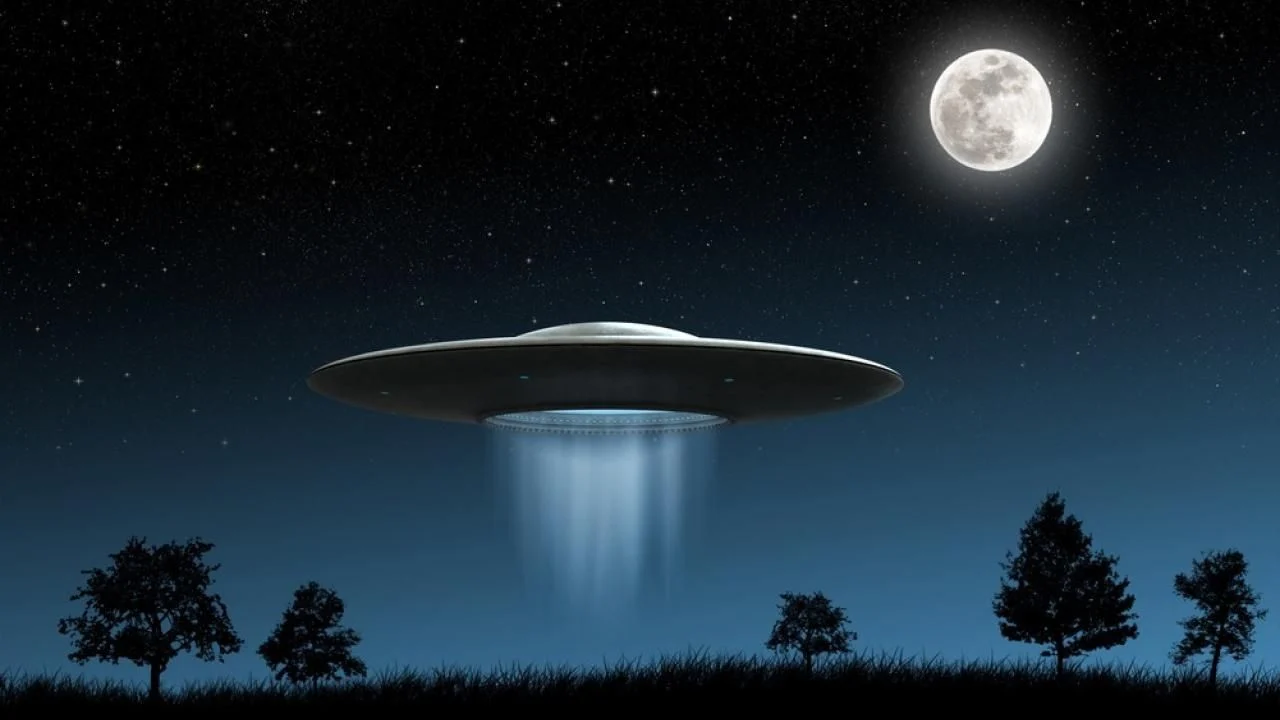


### Introducción

En los cielos que cubren nuestro planeta, la humanidad ha sido espectadora de fenómenos inexplicables que desafían nuestra comprensión tradicional. Los avistamientos de Objetos Voladores No Identificados (OVNIs) han creado mucha imaginación y curiosidad de personas de todo el mundo a lo largo de los siglos. Este proyecto sobre los avistamientos de los OVNIs se embarca en la exploración y análisis de un conjunto de datos que registra estos misteriosos encuentros, con el propósito de arrojar luz sobre un fenómeno que ha persistido a lo largo de la historia. Buscamos extraer conocimiento de estos relatos, utilizando técnicas de ciencia de datos para identificar patrones, tendencias y posibles correlaciones.

### Filas y columnas

<table>
  <tr>
    <th>Nombre de la columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Date_time</td>
    <td>Día, hora y año del avistamiento.</td>
  </tr>
  <tr>
    <td>Year</td>
    <td>Año del avistamiento.</td>
  </tr>
  <tr>
    <td>Month</td>
    <td>Mes del avistamiento.</td>
  </tr>
  <tr>
    <td>Hour</td>
    <td>Hora del avistamiento.</td>
  </tr>
  <tr>
    <td>Season</td>
    <td>Estación del año.</td>
  </tr>
  <tr>
    <td>Country Code</td>
    <td>Código del pais.</td>
  </tr>
  <tr>
    <td>Country</td>
    <td>Pais donde se ha avistado.</td>
  </tr>
  <tr>
    <td>Region</td>
    <td>Region, estado o provincia donde se ha avistado.</td>
  </tr>
  <tr>
    <td>Locale</td>
    <td>Localidad o ciudad donde se ha avistado.</td>
  </tr>
  <tr>
    <td>Latitude</td>
    <td>Coordenadas de latitud del avistamiento.</td>
  </tr>
  <tr>
    <td>Longitude</td>
    <td>Coordenadas de longitud del avistamiento.</td>
  </tr>
  <tr>
    <td>UFO_shape</td>
    <td>Tipo de OVNI.</td>
  </tr>
  <tr>
    <td>Duration_senconds</td>
    <td>Duracion del avistamiento en segundos.</td>
  </tr>
  <tr>
    <td>Encounter duration</td>
    <td>Duración del avistamiento en general.</td>
  </tr>
  <tr>
    <td>Description</td>
    <td>Descripcion del avistamiento.</td>
  </tr>
  <tr>
    <td>duration_minutes</td>
    <td>Duracion del avistamiento en minutos.</td>
  </tr>
  <tr>
    <td>Day_of_week</td>
    <td>Dia de la semana del avistamiento.</td>
  </tr>
  <tr>
    <td>Date</td>
    <td>Fecha del avistamiento (sin la hora).</td>
  </tr>
  <tr>
    <td>Time</td>
    <td>Hora exacta del avistamiento.</td>
  </tr>
</table>

### Importamos librerías

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly as px
import plotly.express as px
import reverse_geocoder as rg
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import plotly.graph_objs as go
from plotly.offline import iplot
import warnings
warnings.filterwarnings("ignore")

### Carga y limpieza del dataset

In [2]:
df = pd.read_csv(r"C:\Users\asus\OneDrive\Documentos\GitHub\UFO_App_Streamlit_Proyecto\UFO_csv.csv")

In [3]:
df.head()

Unnamed: 0            Date_time date_documented  Year  Month  Hour  Season  \
0           0  1949-10-10 20:30:00       4/27/2004  1949     10    20  Autumn   
1           1  1949-10-10 21:00:00      12/16/2005  1949     10    21  Autumn   
2           2  1955-10-10 17:00:00       1/21/2008  1955     10    17  Autumn   
3           3  1956-10-10 21:00:00       1/17/2004  1956     10    21  Autumn   
4           4  1960-10-10 20:00:00       1/22/2004  1960     10    20  Autumn   

  Country_Code         Country   Region        Locale   latitude   longitude  \
0          USA   United States    Texas    San Marcos  29.883056  -97.941111   
1          USA   United States    Texas  Bexar County  29.384210  -98.581082   
2          GBR  United Kingdom  England       Chester  53.200000   -2.916667   
3          USA   United States    Texas          Edna  28.978333  -96.645833   
4          USA   United States   Hawaii       Kaneohe  21.418056 -157.803611   

  UFO_shape  length_of_encounter_seconds Encounter_Duration  \
0  Cylinder                       2700.0         45 minutes   
1     Light                       7200.0            1-2 hrs   
2    Circle                         20.0         20 seconds   
3    Circle                         20.0           1/2 hour   
4     Light                        900.0         15 minutes   

                                         Description  
0  This event took place in early fall around 194...  
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  
2  Green/Orange circular disc over Chester&#44 En...  
3  My older brother and twin sister were leaving ...  
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...

Renombramos la columna 'length_of_encounter_seconds' a 'duration_seconds'

In [4]:
df.rename(columns={'length_of_encounter_seconds': 'duration_seconds'}, inplace=True)

Creamos una columna de duracion en minutos a partir de la anterior

In [5]:
df['duration_minutes'] = df['duration_seconds'] / 60
df.head()

Unnamed: 0            Date_time date_documented  Year  Month  Hour  Season  \
0           0  1949-10-10 20:30:00       4/27/2004  1949     10    20  Autumn   
1           1  1949-10-10 21:00:00      12/16/2005  1949     10    21  Autumn   
2           2  1955-10-10 17:00:00       1/21/2008  1955     10    17  Autumn   
3           3  1956-10-10 21:00:00       1/17/2004  1956     10    21  Autumn   
4           4  1960-10-10 20:00:00       1/22/2004  1960     10    20  Autumn   

  Country_Code         Country   Region        Locale   latitude   longitude  \
0          USA   United States    Texas    San Marcos  29.883056  -97.941111   
1          USA   United States    Texas  Bexar County  29.384210  -98.581082   
2          GBR  United Kingdom  England       Chester  53.200000   -2.916667   
3          USA   United States    Texas          Edna  28.978333  -96.645833   
4          USA   United States   Hawaii       Kaneohe  21.418056 -157.803611   

  UFO_shape  duration_seconds Encounter_Duration  \
0  Cylinder            2700.0         45 minutes   
1     Light            7200.0            1-2 hrs   
2    Circle              20.0         20 seconds   
3    Circle              20.0           1/2 hour   
4     Light             900.0         15 minutes   

                                         Description  duration_minutes  
0  This event took place in early fall around 194...         45.000000  
1  1949 Lackland AFB&#44 TX.  Lights racing acros...        120.000000  
2  Green/Orange circular disc over Chester&#44 En...          0.333333  
3  My older brother and twin sister were leaving ...          0.333333  
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...         15.000000

Transformamos la columna Date_Time a formato fecha y hora

In [6]:
df['Date_time'] = pd.to_datetime(df['Date_time'])


Y creamos una columna con el dia de la semana

In [7]:
df['Day_of_week'] = pd.to_datetime(df['Date_time']).dt.day_name() 

df.head()

Unnamed: 0           Date_time date_documented  Year  Month  Hour  Season  \
0           0 1949-10-10 20:30:00       4/27/2004  1949     10    20  Autumn   
1           1 1949-10-10 21:00:00      12/16/2005  1949     10    21  Autumn   
2           2 1955-10-10 17:00:00       1/21/2008  1955     10    17  Autumn   
3           3 1956-10-10 21:00:00       1/17/2004  1956     10    21  Autumn   
4           4 1960-10-10 20:00:00       1/22/2004  1960     10    20  Autumn   

  Country_Code         Country   Region        Locale   latitude   longitude  \
0          USA   United States    Texas    San Marcos  29.883056  -97.941111   
1          USA   United States    Texas  Bexar County  29.384210  -98.581082   
2          GBR  United Kingdom  England       Chester  53.200000   -2.916667   
3          USA   United States    Texas          Edna  28.978333  -96.645833   
4          USA   United States   Hawaii       Kaneohe  21.418056 -157.803611   

  UFO_shape  duration_seconds Encounter_Duration  \
0  Cylinder            2700.0         45 minutes   
1     Light            7200.0            1-2 hrs   
2    Circle              20.0         20 seconds   
3    Circle              20.0           1/2 hour   
4     Light             900.0         15 minutes   

                                         Description  duration_minutes  \
0  This event took place in early fall around 194...         45.000000   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...        120.000000   
2  Green/Orange circular disc over Chester&#44 En...          0.333333   
3  My older brother and twin sister were leaving ...          0.333333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...         15.000000   

  Day_of_week  
0      Monday  
1      Monday  
2      Monday  
3   Wednesday  
4      Monday

Separamos la columna Date_Time en dos columnas : Date y Time

In [8]:
df['Date'] = pd.to_datetime(df['Date_time']).dt.date
df['Time'] = pd.to_datetime(df['Date_time']).dt.time

df.head()

Unnamed: 0           Date_time date_documented  Year  Month  Hour  Season  \
0           0 1949-10-10 20:30:00       4/27/2004  1949     10    20  Autumn   
1           1 1949-10-10 21:00:00      12/16/2005  1949     10    21  Autumn   
2           2 1955-10-10 17:00:00       1/21/2008  1955     10    17  Autumn   
3           3 1956-10-10 21:00:00       1/17/2004  1956     10    21  Autumn   
4           4 1960-10-10 20:00:00       1/22/2004  1960     10    20  Autumn   

  Country_Code         Country   Region  ...   latitude   longitude  \
0          USA   United States    Texas  ...  29.883056  -97.941111   
1          USA   United States    Texas  ...  29.384210  -98.581082   
2          GBR  United Kingdom  England  ...  53.200000   -2.916667   
3          USA   United States    Texas  ...  28.978333  -96.645833   
4          USA   United States   Hawaii  ...  21.418056 -157.803611   

   UFO_shape duration_seconds  Encounter_Duration  \
0   Cylinder           2700.0          45 minutes   
1      Light           7200.0             1-2 hrs   
2     Circle             20.0          20 seconds   
3     Circle             20.0            1/2 hour   
4      Light            900.0          15 minutes   

                                         Description duration_minutes  \
0  This event took place in early fall around 194...        45.000000   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...       120.000000   
2  Green/Orange circular disc over Chester&#44 En...         0.333333   
3  My older brother and twin sister were leaving ...         0.333333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...        15.000000   

   Day_of_week        Date      Time  
0       Monday  1949-10-10  20:30:00  
1       Monday  1949-10-10  21:00:00  
2       Monday  1955-10-10  17:00:00  
3    Wednesday  1956-10-10  21:00:00  
4       Monday  1960-10-10  20:00:00  

[5 rows x 21 columns]

Aqui podreis ver un mapa de calor con los valores nulos que tenemos en nuestro conjunto de datos... que serian un total de 3486 nulos

3486

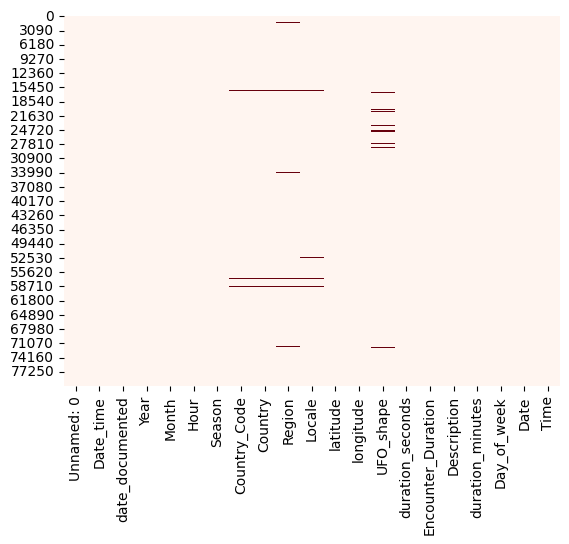

In [9]:
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
df.isnull().sum().sum()

Aquí podreis ver el porcentaje de los valores nulos que tenemos en nuestro conjunto de datos

In [10]:
df.isnull().mean() * 100

Unnamed: 0            0.000000
Date_time             0.000000
date_documented       0.000000
Year                  0.000000
Month                 0.000000
Hour                  0.000000
Season                0.000000
Country_Code          0.322428
Country               0.322428
Region                0.704611
Locale                0.568917
latitude              0.000000
longitude             0.000000
UFO_shape             2.402649
duration_seconds      0.000000
Encounter_Duration    0.000000
Description           0.018673
duration_minutes      0.000000
Day_of_week           0.000000
Date                  0.000000
Time                  0.000000
dtype: float64

Vemos como los porcentajes de nulos son muy bajos, el mayor valor no llega a 2,5%, por lo que no afectaría en gran mdida eliminarlos cuando ya hayamos tratado todos los datos.

In [11]:
# Eliminamos las columnas que no nos interesan

df.drop(columns=["Unnamed: 0"], inplace=True)
df.drop(columns=["date_documented"], inplace=True)

A continuación vamos a rellenar los valores faltantes con la función reverse_geocoding y así hacer un arreglo sobre parte de ellos

In [12]:
# Creamos una variable con la tupla de latitud y longitud para pasarle a reverse_geocoding 
# (El reverse geocoding obtiene información sobre la ubicación geográfica a partir de coordenadas)

coordinates = list(zip(df['latitude'], df['longitude']))

In [13]:
# Le pasamos a geocoding las coordenadas para que me devuelva países en una lista
results = rg.search(coordinates)
print(results[:10])

Loading formatted geocoded file...
[{'lat': '29.88327', 'lon': '-97.94139', 'name': 'San Marcos', 'admin1': 'Texas', 'admin2': 'Hays County', 'cc': 'US'}, {'lat': '29.38663', 'lon': '-98.61797', 'name': 'Lackland Air Force Base', 'admin1': 'Texas', 'admin2': 'Bexar County', 'cc': 'US'}, {'lat': '53.20832', 'lon': '-2.9253', 'name': 'Blacon', 'admin1': 'England', 'admin2': 'Cheshire West and Chester', 'cc': 'GB'}, {'lat': '28.97859', 'lon': '-96.64609', 'name': 'Edna', 'admin1': 'Texas', 'admin2': 'Jackson County', 'cc': 'US'}, {'lat': '21.40929', 'lon': '-157.80092', 'name': "Kane'ohe", 'admin1': 'Hawaii', 'admin2': 'Honolulu County', 'cc': 'US'}, {'lat': '36.59511', 'lon': '-82.18874', 'name': 'Bristol', 'admin1': 'Tennessee', 'admin2': 'Sullivan County', 'cc': 'US'}, {'lat': '51.4386', 'lon': '-3.17342', 'name': 'Penarth', 'admin1': 'Wales', 'admin2': 'Vale of Glamorgan', 'cc': 'GB'}, {'lat': '41.1176', 'lon': '-73.4079', 'name': 'Norwalk', 'admin1': 'Connecticut', 'admin2': 'Fairfie

Avistamiento de Lackland (AirForce Base), Texas

In [14]:
# Latitud y longitud vemos que es practicamente la misma, que es lo que usa para encontrar países la función reverse_geocoding

df.loc[1,['latitude','longitude','Locale','Region','Country']]


latitude          29.38421
longitude       -98.581082
Locale        Bexar County
Region               Texas
Country      United States
Name: 1, dtype: object

In [15]:
# Ahora convertimos a DataFrame y unimos nuestro df con lo que nos interesa de la lista
results_df = pd.DataFrame(results)

# Seleccionamos que columnas queremos agregar de results_df a nuestros datos
df['Locale']=results_df['name']
df['Region'] = results_df['admin1']

(df[['Country','Region','Locale']])

Country      Region                   Locale
0       United States       Texas               San Marcos
1       United States       Texas  Lackland Air Force Base
2      United Kingdom     England                   Blacon
3       United States       Texas                     Edna
4       United States      Hawaii                 Kane'ohe
...               ...         ...                      ...
80323   United States   Tennessee                Nashville
80324   United States       Idaho                    Boise
80325   United States  California                     Napa
80326   United States    Virginia                   Vienna
80327   United States    Oklahoma                   Edmond

[80328 rows x 3 columns]

In [16]:
# Pasamos a nulo y asignamos nombre de la ciudad
df['Region'] = df['Region'].replace({'': np.nan})

# Y ahora a esos nulos le asignamos el nombre de la ciudad
df['Region'] = df['Region'].fillna(df['Locale'])

Con esto rellenamos los valores faltantes en la columna Region con el nombre de la Locale, algo que en las gráficas mejora la visualización de los nombre.

In [17]:
df.isnull().sum()

Date_time                0
Year                     0
Month                    0
Hour                     0
Season                   0
Country_Code           259
Country                259
Region                   0
Locale                   0
latitude                 0
longitude                0
UFO_shape             1930
duration_seconds         0
Encounter_Duration       0
Description             15
duration_minutes         0
Day_of_week              0
Date                     0
Time                     0
dtype: int64

Vemos como la columna Country y Country_Code tienen la misma cantidad de valores nulos, lo que os hace suponer que son las mismas filas.

In [18]:
# Eliminar nulos de country
df.dropna(subset=['Country'], inplace=True)

# Rellenamos los nulos de la columna UFO_shape y Description con "No data"
df['UFO_shape'] = df['UFO_shape'].fillna("No data")
df['Description'] = df['Description'].fillna("No data")

In [19]:
df.isnull().sum()

Date_time             0
Year                  0
Month                 0
Hour                  0
Season                0
Country_Code          0
Country               0
Region                0
Locale                0
latitude              0
longitude             0
UFO_shape             0
duration_seconds      0
Encounter_Duration    0
Description           0
duration_minutes      0
Day_of_week           0
Date                  0
Time                  0
dtype: int64

Al eliminar la columna Country vemos como se confirma nuestra sospecha de que fuesen asociados los nulos entre ellas.

In [20]:
grouped = df.groupby(['latitude', 'longitude'])
grouped_regions = grouped['Country'].unique().reset_index()
grouped_regions

latitude   longitude          Country
0     -46.413187  168.353773    [New Zealand]
1     -46.163992  169.875050    [New Zealand]
2     -45.097512  170.970415    [New Zealand]
3     -45.031162  168.662644    [New Zealand]
4     -43.532054  172.636225    [New Zealand]
...          ...         ...              ...
20304  70.292489 -161.903334  [United States]
20305  70.416667 -148.916667  [United States]
20306  70.636944 -160.038333  [United States]
20307  71.387500 -156.481111  [United States]
20308  72.700000  -78.000000         [Canada]

[20309 rows x 3 columns]

### Traducimos columnas que nos salgen en inglés para las visualizaciones en las gráficas

In [21]:
# Traducimos mediante un diccionario la columna 'Season'
diccionario_estaciones = {
    'Autumn': 'Otoño',
    'Winter': 'Invierno',
    'Spring': 'Primavera',
    'Summer': 'Verano'
}
df['Season'] = df['Season'].map(diccionario_estaciones)
print(df['Season'].unique())


['Otoño' 'Invierno' 'Primavera' 'Verano']


In [22]:
# Traducimos mediante un diccionario la columna 'Day_of_week'
diccionario_dias_semana = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df['Day_of_week'] = df['Day_of_week'].map(diccionario_dias_semana)
print(df['Day_of_week'].unique())

['Lunes' 'Miércoles' 'Martes' 'Domingo' 'Jueves' 'Sábado' 'Viernes']


In [24]:
# Traducimos mediante un diccionario la columna 'Day_of_week'
diccionario_formas_ovnis = {
    'Cylinder': 'Cilindro',
    'Light': 'Luz',
    'Circle': 'Círculo',
    'Sphere': 'Esfera',
    'Disk': 'Disco',
    'Fireball': 'Bola de fuego',
    'Unknown': 'Desconocido',
    'Oval': 'Ovalado',
    'Other': 'Otro',
    'Cigar': 'Cigarro',
    'Rectangle': 'Rectángulo',
    'Chevron': 'Cheurón',
    'Triangle': 'Triángulo',
    'Formation': 'Formación',
    'No data': 'Sin datos',
    'Delta': 'Delta',
    'Changing': 'Cambiante',
    'Egg': 'Huevo',
    'Diamond': 'Diamante',
    'Flash': 'Destello',
    'Teardrop': 'Lágrima',
    'Cone': 'Cono',
    'Cross': 'Cruz',
    'Pyramid': 'Pirámide',
    'Round': 'Redondo',
    'Crescent': 'Creciente',
    'Flare': 'Resplandor',
    'Hexagon': 'Hexágono',
    'Dome': 'Cúpula',
    'Changed': 'Cambiado'
}

df['UFO_shape'] = df['UFO_shape'].map(diccionario_formas_ovnis)
print(df['UFO_shape'].unique())


['Cilindro' 'Luz' 'Círculo' 'Esfera' 'Disco' 'Bola de fuego' 'Desconocido'
 'Ovalado' 'Otro' 'Cigarro' 'Rectángulo' 'Cheurón' 'Triángulo' 'Formación'
 'Sin datos' 'Delta' 'Cambiante' 'Huevo' 'Diamante' 'Destello' 'Lágrima'
 'Cono' 'Cruz' 'Pirámide' 'Redondo' 'Creciente' 'Resplandor' 'Hexágono'
 'Cúpula' 'Cambiado']


### Creamos un Csv de nuestros datos ya limpios

In [25]:
#df.to_csv('UFO_final.csv', index=False)

# Análisis Gráfico

### Relación entre variables de tipo de Ovni

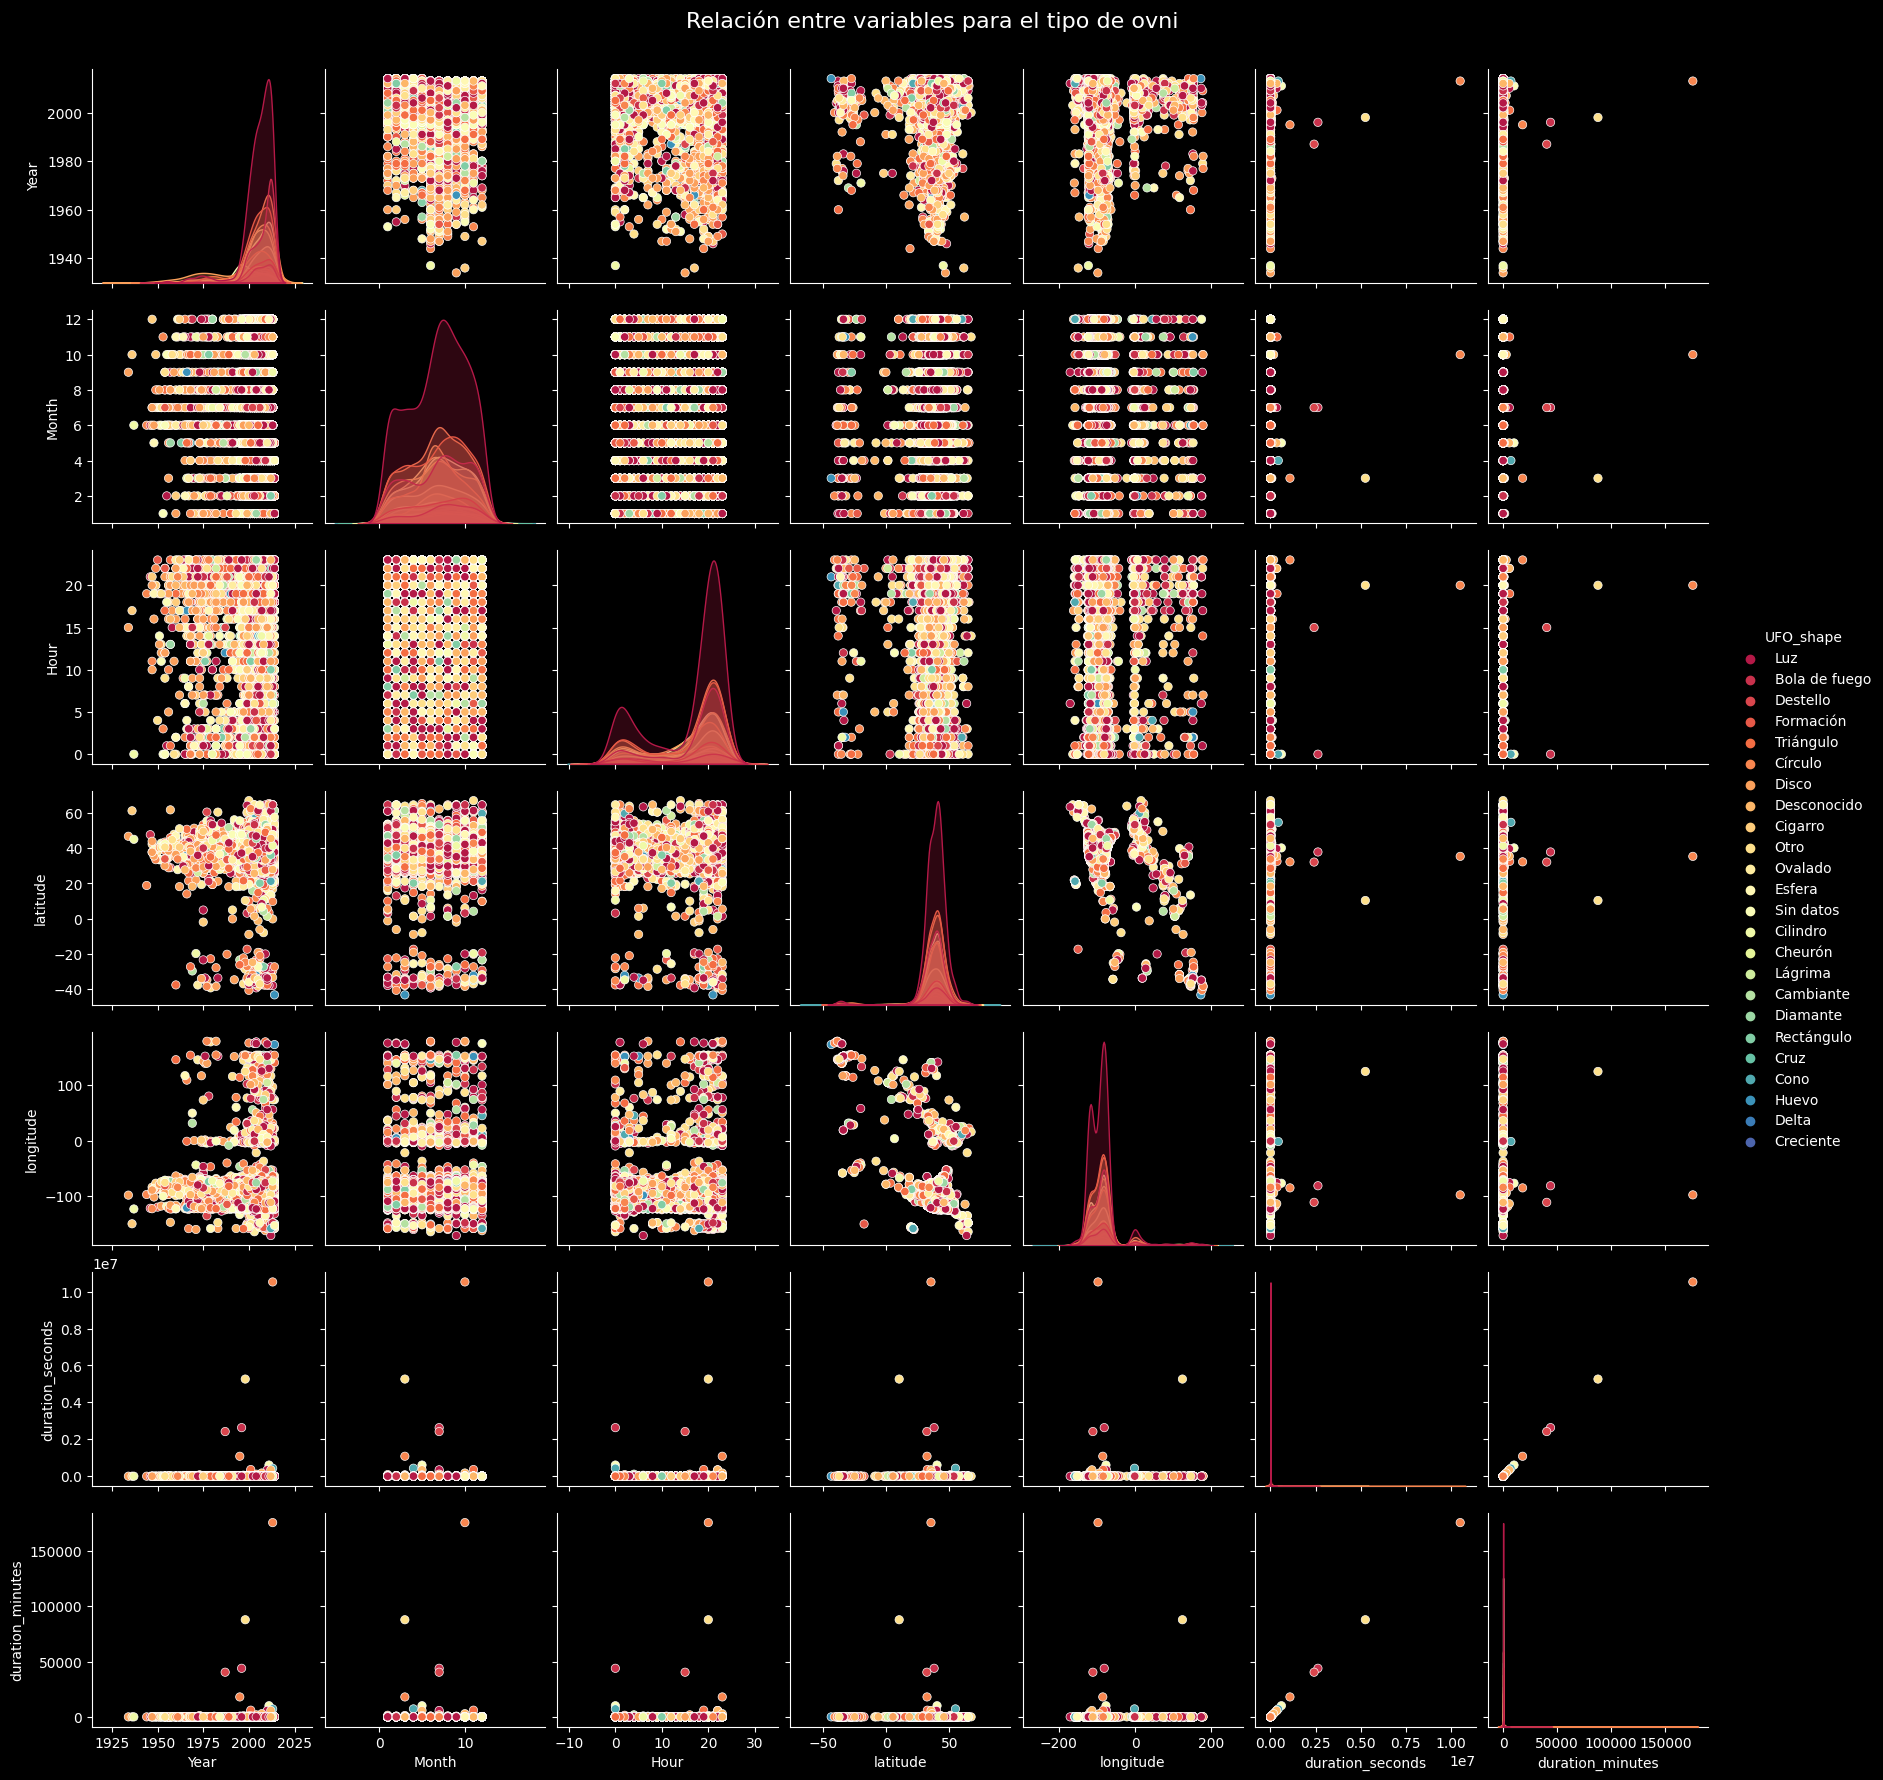

In [26]:
df_sample = df.sample(frac=0.1) # Reduzco el porcentaje del df para que sea más óptima la visualización y la carga
plt.style.use('dark_background')
sns.pairplot(df_sample, hue='UFO_shape', height=2.5, palette='Spectral')
plt.suptitle('Relación entre variables para el tipo de ovni', y=1.02, fontsize=16)
plt.show()

### Mapa de correlaciones

In [27]:
df.corr()

Year     Month      Hour  latitude  longitude  \
Year              1.000000 -0.025007  0.040457 -0.000489  -0.013159   
Month            -0.025007  1.000000  0.023665  0.029454  -0.010650   
Hour              0.040457  0.023665  1.000000  0.009986  -0.011926   
latitude         -0.000489  0.029454  0.009986  1.000000  -0.394254   
longitude        -0.013159 -0.010650 -0.011926 -0.394254   1.000000   
duration_seconds -0.010480  0.001296 -0.002789  0.002669   0.006575   
duration_minutes -0.010480  0.001296 -0.002789  0.002669   0.006575   

                  duration_seconds  duration_minutes  
Year                     -0.010480         -0.010480  
Month                     0.001296          0.001296  
Hour                     -0.002789         -0.002789  
latitude                  0.002669          0.002669  
longitude                 0.006575          0.006575  
duration_seconds          1.000000          1.000000  
duration_minutes          1.000000          1.000000

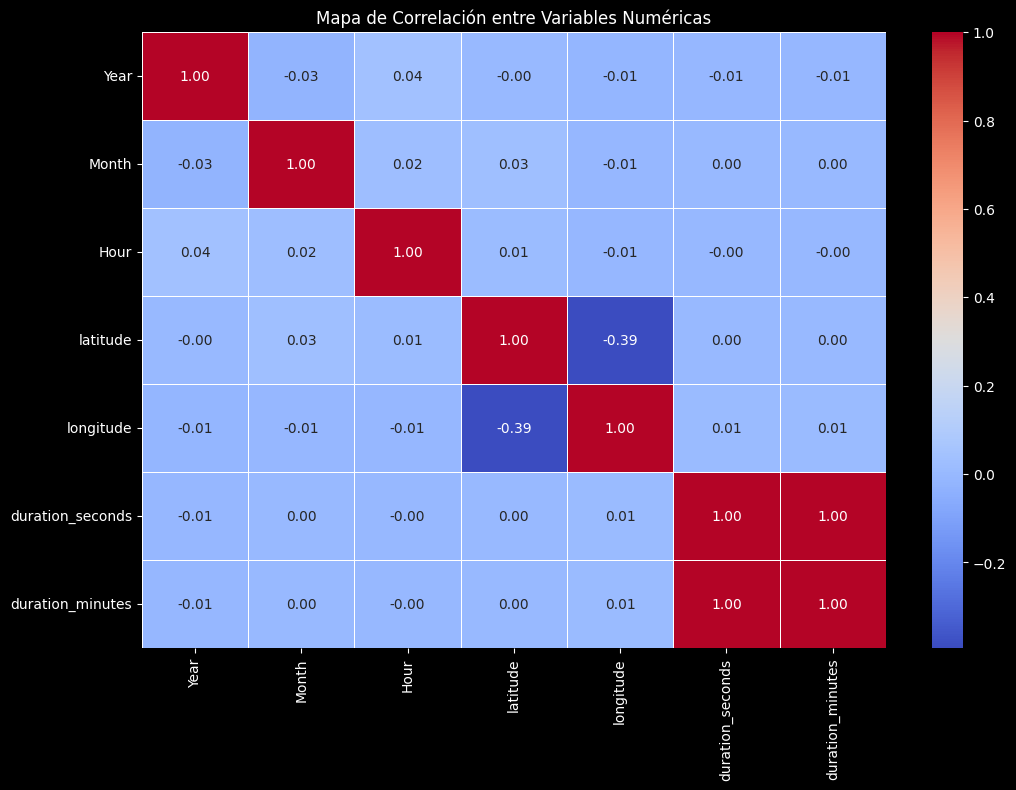

In [28]:
# Seleccionar solo las columnas numéricas para el mapa de correlación
df_numeric = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Correlación entre Variables Numéricas')
plt.show()


### Mostrar una de las variables continuas y su relación frente a otra variable que actúe de objetivo.

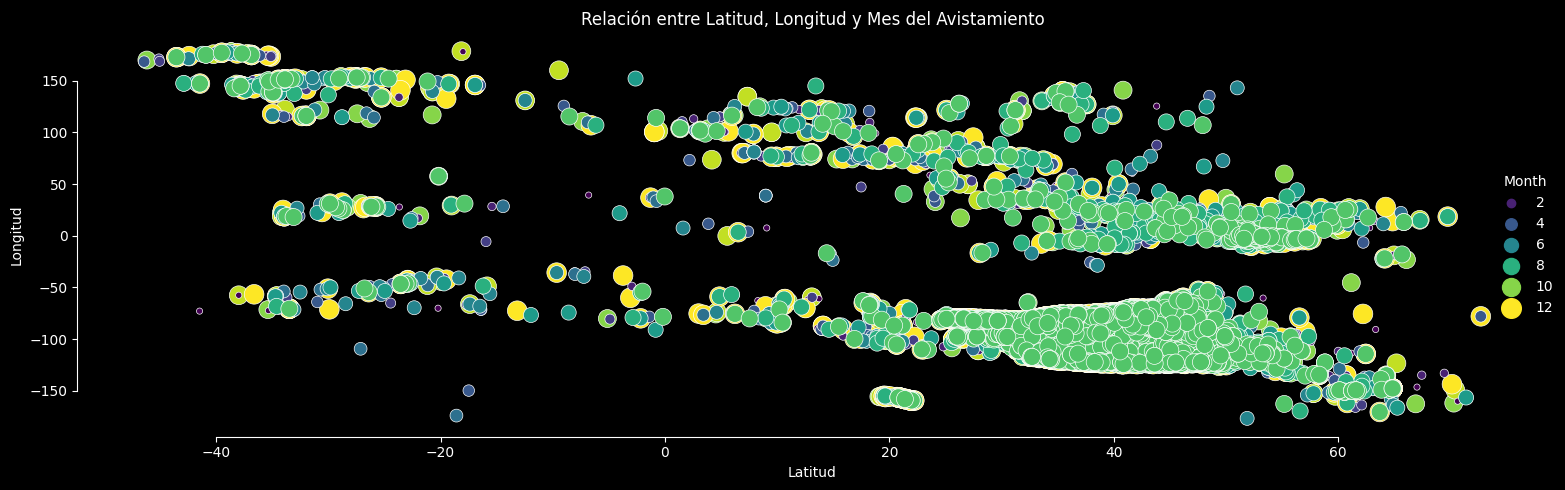

In [29]:
# Selecciona las columnas relevantes de tu dataset
columns_to_plot = ['latitude', 'longitude', 'Month']

g = sns.relplot(data=df, x='latitude', y='longitude', hue='Month', palette='viridis', size='Month', sizes=(20, 200), aspect=3)
g.ax.set_title("Relación entre Latitud, Longitud y Mes del Avistamiento")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
sns.despine(trim=True)
plt.tight_layout()

### Evolución de los avistamientos por año

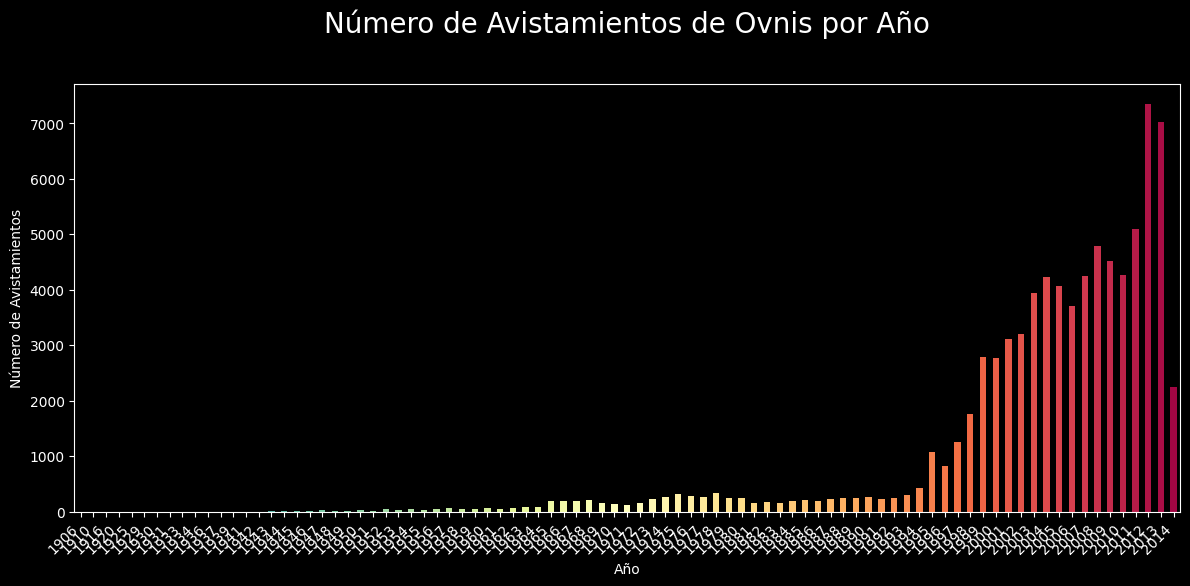

In [30]:
# Obtener la frecuencia de avistamientos por año
avistamientos_por_año = df['Year'].value_counts()

# Ordenar los años
años_ordenados = sorted(avistamientos_por_año.index)

color_palette = sns.color_palette("Spectral", n_colors=len(años_ordenados))[::-1]

plt.figure(figsize=(12, 6))
avistamientos_por_año.loc[años_ordenados].plot(kind='bar', color=color_palette)
plt.title('Número de Avistamientos de Ovnis por Año', fontsize = 20, y=1.1)
plt.xlabel('Año')
plt.ylabel('Número de Avistamientos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Durante los años 1906 - 1945 ...

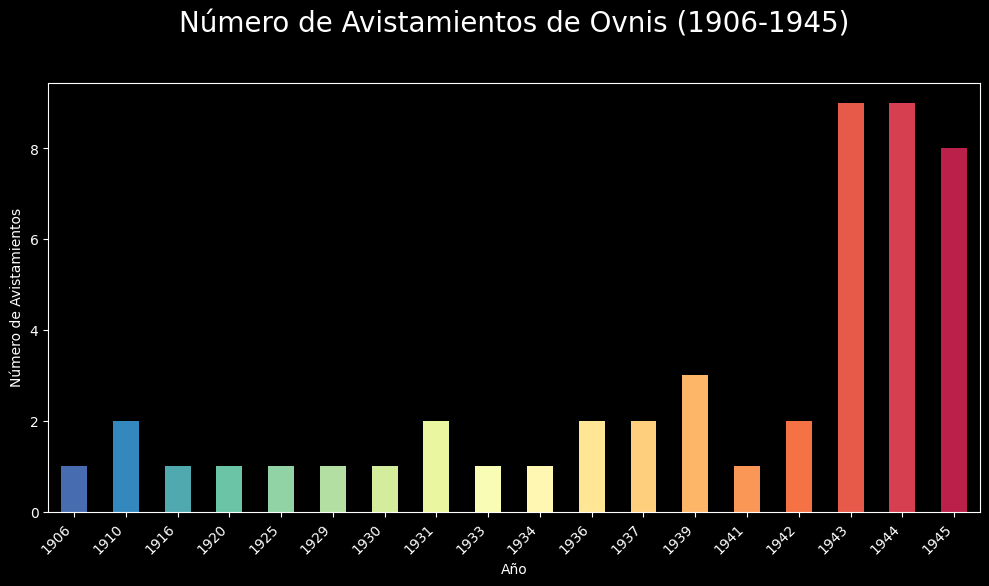

In [31]:
df_1906_1945 = df[(df['Year'] >= 1906) & (df['Year'] <= 1945)]

# Obtener la frecuencia de avistamientos por año en el rango (1906-1945)
avistamientos_1906_1945 = df_1906_1945['Year'].value_counts()

# Ordenar los años en el rango (1906-1945)
años_ordenados_1906_1945 = sorted(avistamientos_1906_1945.index)

color_palette = sns.color_palette("Spectral", n_colors=len(años_ordenados_1906_1945))[::-1]

# Crear la gráfica de barras para el rango (1906-1945)
plt.figure(figsize=(10, 6))
avistamientos_1906_1945.loc[años_ordenados_1906_1945].plot(kind='bar', color=color_palette)
plt.title('Número de Avistamientos de Ovnis (1906-1945)', fontsize = 20, y=1.1)
plt.xlabel('Año')
plt.ylabel('Número de Avistamientos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### 1946 - 1970

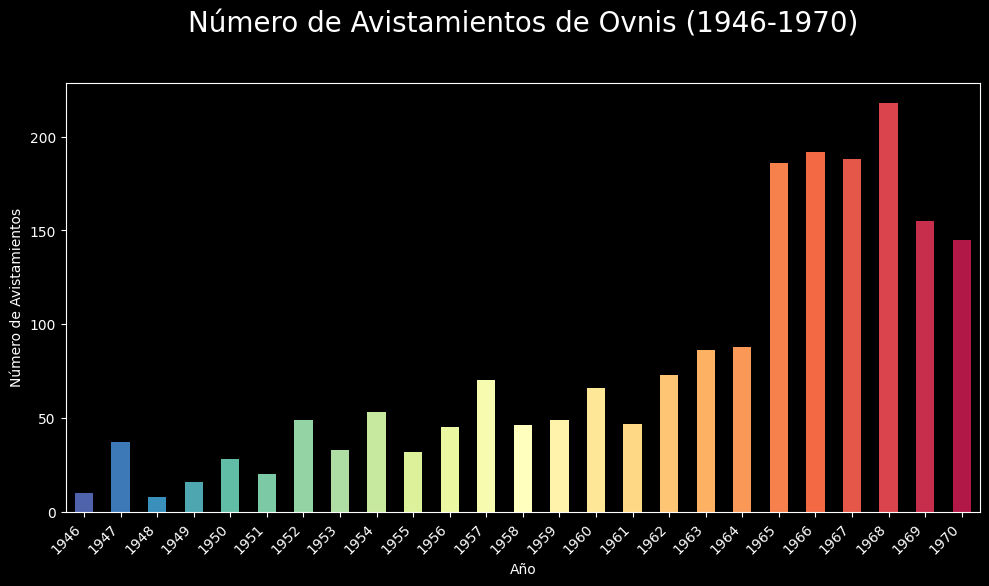

In [32]:
df_1946_1970 = df[(df['Year'] >= 1946) & (df['Year'] <= 1970)]

# Obtener la frecuencia de avistamientos por año en el rango (1946-1970)
avistamientos_1946_1970 = df_1946_1970['Year'].value_counts()

# Ordenar los años en el rango (1939-1959)
años_ordenados_1946_1970 = sorted(avistamientos_1946_1970.index)

color_palette = sns.color_palette("Spectral", n_colors=len(años_ordenados_1946_1970))[::-1]

# Crear la gráfica de barras para el rango (1946-1970)
plt.figure(figsize=(10, 6))
avistamientos_1946_1970.loc[años_ordenados_1946_1970].plot(kind='bar', color=color_palette)
plt.title('Número de Avistamientos de Ovnis (1946-1970)', fontsize = 20, y=1.1)
plt.xlabel('Año')
plt.ylabel('Número de Avistamientos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### 1971 - 2000

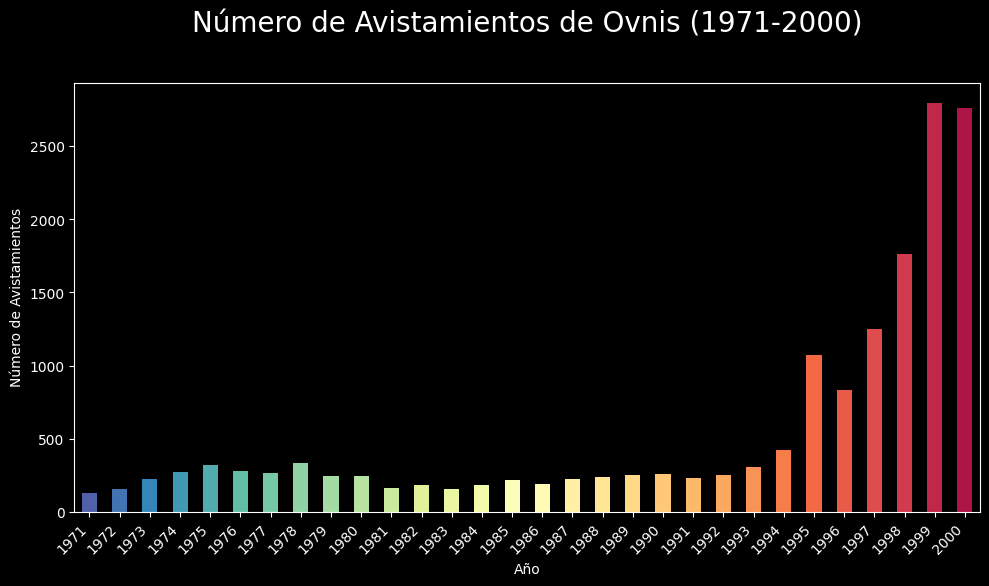

In [33]:
# Filtrar datos para el rango de años (1971-2000)
df_1971_2000 = df[(df['Year'] >= 1971) & (df['Year'] <= 2000)]

# Obtener la frecuencia de avistamientos por año en el rango (1971-2000)
avistamientos_1971_2000 = df_1971_2000['Year'].value_counts()

# Ordenar los años en el rango (1971-2000)
años_ordenados_1971_2000 = sorted(avistamientos_1971_2000.index)

color_palette = sns.color_palette("Spectral", n_colors=len(años_ordenados_1971_2000))[::-1]

# Crear la gráfica de barras para el rango (1971-2000)
plt.figure(figsize=(10, 6))
avistamientos_1971_2000.loc[años_ordenados_1971_2000].plot(kind='bar', color=color_palette)
plt.title('Número de Avistamientos de Ovnis (1971-2000)', fontsize = 20, y=1.1)
plt.xlabel('Año')
plt.ylabel('Número de Avistamientos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Y para acabar 2001 - 2014 ...

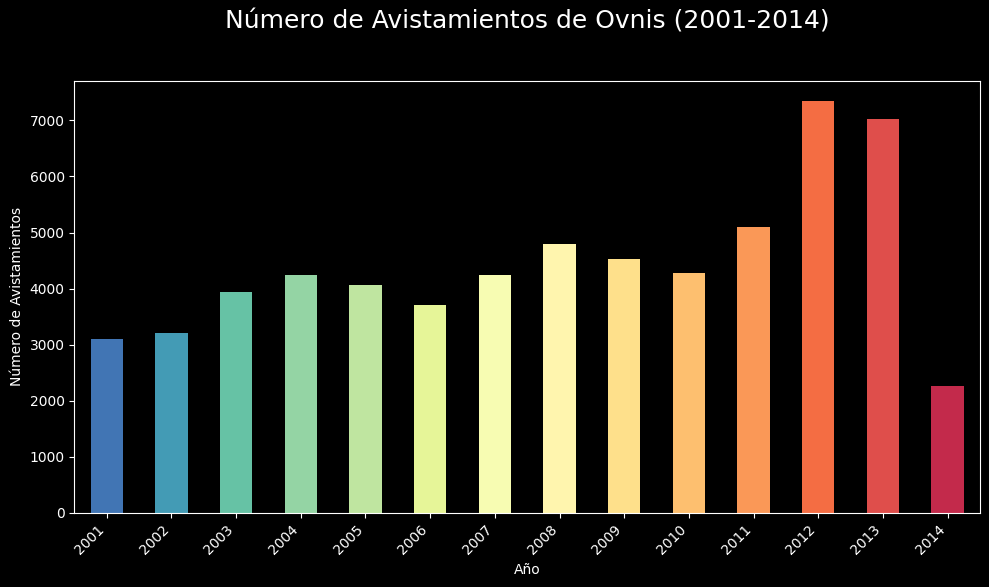

In [34]:
# Filtrar datos para el rango de años (2001-2014)
df_2001_2014 = df[(df['Year'] >= 2001) & (df['Year'] <= 2014)]

# Obtener la frecuencia de avistamientos por año en el rango (2001-2014)
avistamientos_2001_2014 = df_2001_2014['Year'].value_counts()

# Ordenar los años en el rango (2001-2014)
años_ordenados_2001_2014 = sorted(avistamientos_2001_2014.index)

# Elegir una paleta de colores de azul eléctrico a amarillo
color_palette = sns.color_palette("Spectral", n_colors=len(años_ordenados_2001_2014))[::-1]

# Crear la gráfica de barras para el rango (2001-2014)
plt.figure(figsize=(10, 6))
avistamientos_2001_2014[años_ordenados_2001_2014].plot(kind='bar', color=color_palette)
plt.title('Número de Avistamientos de Ovnis (2001-2014)', fontsize = 18, y=1.1)
plt.xlabel('Año')
plt.ylabel('Número de Avistamientos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Avistamientos por época del año

Aquí podremos ver los porcentajes

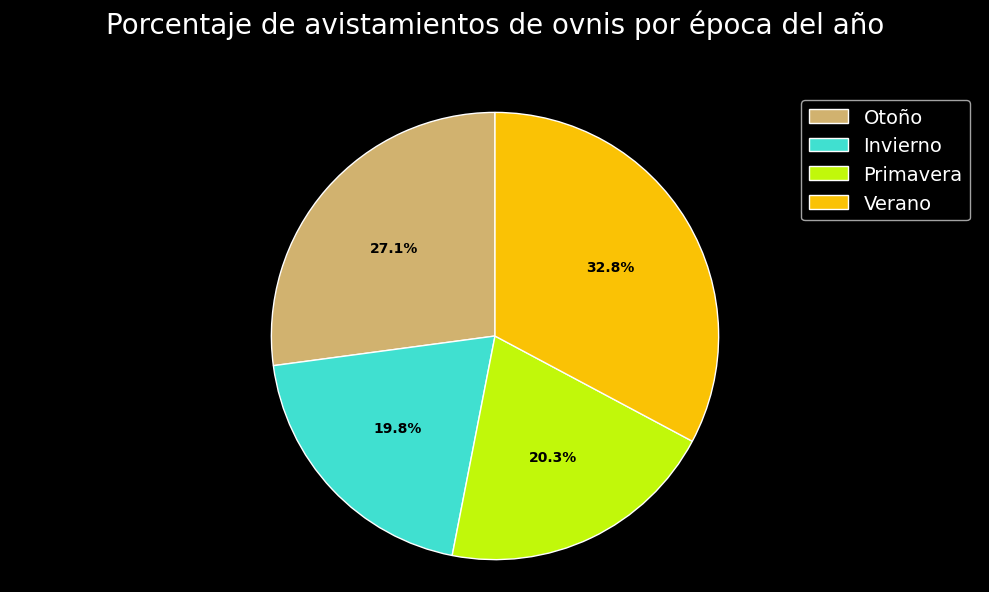

In [35]:
avistamientos_por_epoca = df['Season'].value_counts()

epocas_ordenadas = ['Otoño', 'Invierno', 'Primavera', 'Verano']
avistamientos_por_epoca = avistamientos_por_epoca.reindex(epocas_ordenadas)
colores_epocas = {'Otoño': '#D1B26F', 'Invierno': '#40E0D0', 'Primavera': '#C1F80A', 'Verano': '#FAC205'}
colores = avistamientos_por_epoca.index.map(colores_epocas)

plt.figure(figsize=(10, 6))
plt.pie(avistamientos_por_epoca, labels=avistamientos_por_epoca.index, autopct='%1.1f%%', colors=colores, startangle=90,
        textprops={'color': 'black', 'weight': 'bold'}, wedgeprops=dict(edgecolor='white'))
plt.title('Porcentaje de avistamientos de ovnis por época del año', fontsize=20, y=1.1)
plt.axis('equal')

legend = plt.legend(avistamientos_por_epoca.index, loc='upper right', bbox_to_anchor=(1, 1), fontsize=14)
for text in legend.get_texts():
    text.set_color('white')
plt.tight_layout()
plt.show()

Si queremos ver el número de avistamiento por época del año...

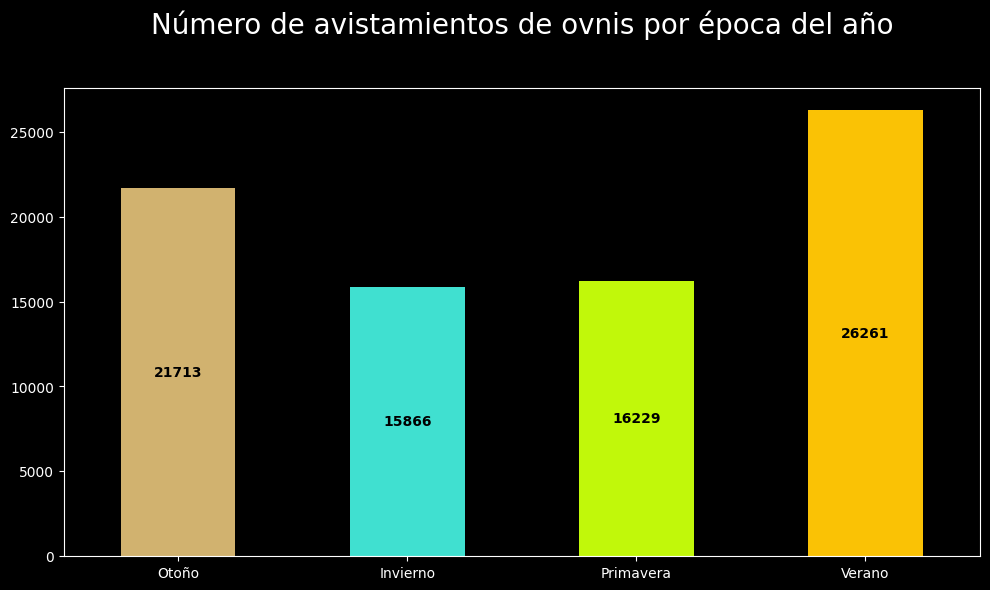

In [36]:
# Obtener la frecuencia de avistamientos por época del año
avistamientos_por_epoca = df['Season'].value_counts()

# Ordenar las épocas del año
epocas_ordenadas = ['Otoño', 'Invierno', 'Primavera', 'Verano']
avistamientos_por_epoca = avistamientos_por_epoca.reindex(epocas_ordenadas)

# Asignar colores característicos a cada época
colores_epocas = {'Otoño': '#D1B26F', 'Invierno': '#40E0D0', 'Primavera': '#C1F80A', 'Verano': '#FAC205'}
colores = avistamientos_por_epoca.index.map(colores_epocas)
# Crear la gráfica de barras con colores característicos
plt.figure(figsize=(10, 6))
avistamientos_por_epoca.plot(kind='bar', color=colores)
plt.title('Número de avistamientos de ovnis por época del año', fontsize = 20, y=1.1)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
# Añado etiquetas de datos encima de las barras
for index, value in enumerate(avistamientos_por_epoca):
    plt.text(index, value/2, str(value), ha='center', va='center', fontsize=10, color='black', fontdict={'weight': 'bold'})
plt.tight_layout()
plt.show()

### Avistamientos por meses del año

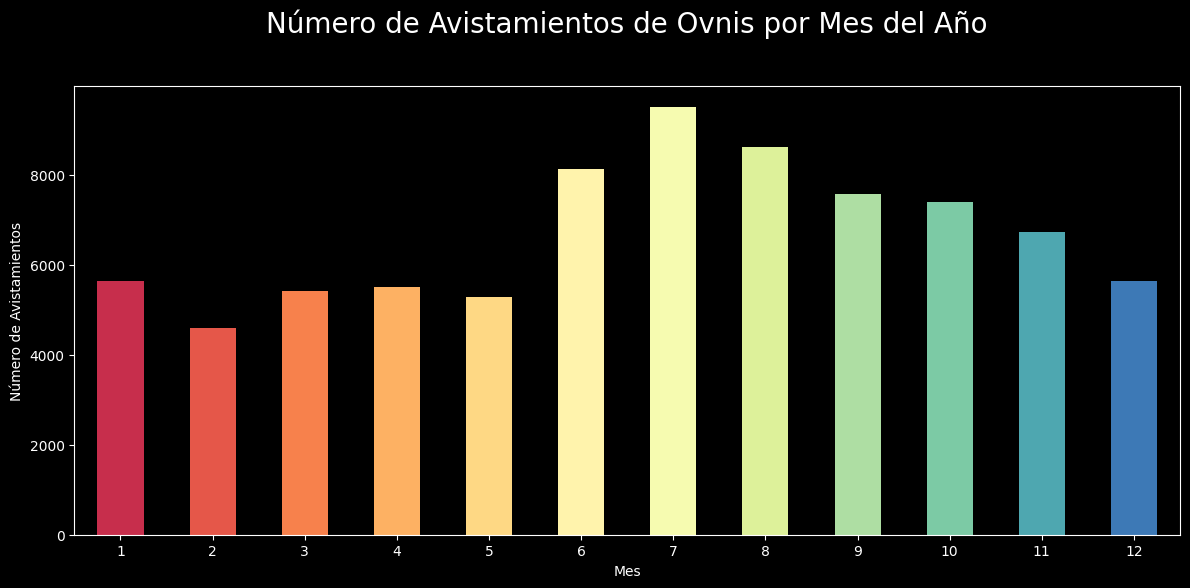

In [37]:
avistamientos_por_mes = df['Month'].value_counts().sort_index()

color_palette = sns.color_palette("Spectral", n_colors=len(avistamientos_por_mes))

# Crear la gráfica de barras con la nueva paleta de colores
plt.figure(figsize=(12, 6))
avistamientos_por_mes.plot(kind='bar', color=color_palette)
plt.title('Número de Avistamientos de Ovnis por Mes del Año', fontsize = 20, y=1.1)
plt.xlabel('Mes')
plt.ylabel('Número de Avistamientos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Avistamientos por día de la semana

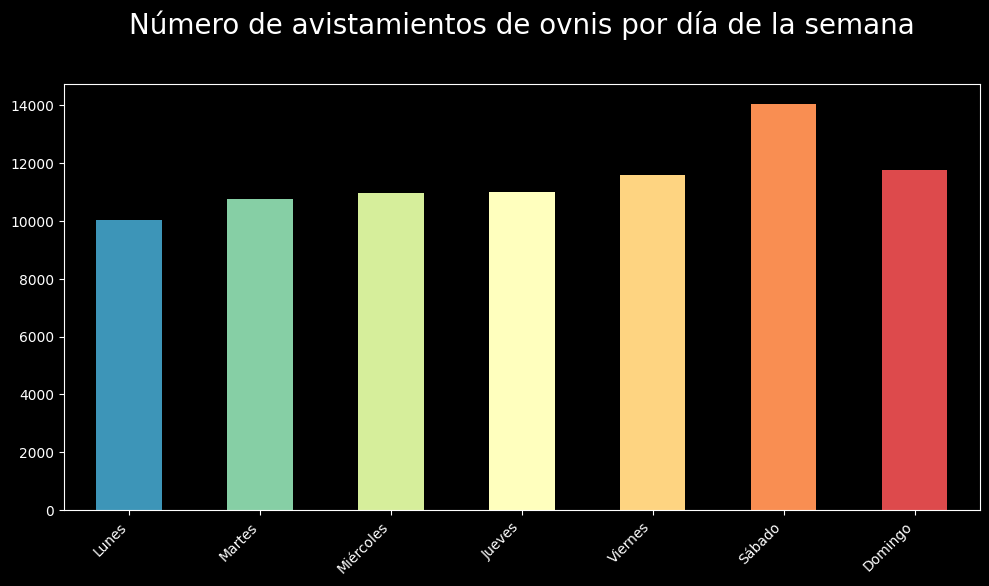

In [38]:
# Contar la frecuencia de avistamientos por día de la semana
avistamientos_por_dia = df['Day_of_week'].value_counts()

# Elegir una paleta de colores de azul eléctrico a amarillo
color_palette = sns.color_palette("Spectral", n_colors=len(avistamientos_por_dia))[::-1]

# Ordenar los días de la semana
dias_ordenados = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
avistamientos_por_dia = avistamientos_por_dia.reindex(dias_ordenados)

# Gráfico
plt.figure(figsize=(10, 6))
avistamientos_por_dia.plot(kind='bar', color=color_palette)
plt.title('Número de avistamientos de ovnis por día de la semana', fontsize = 20, y=1.1)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Avistamientos por hora del día

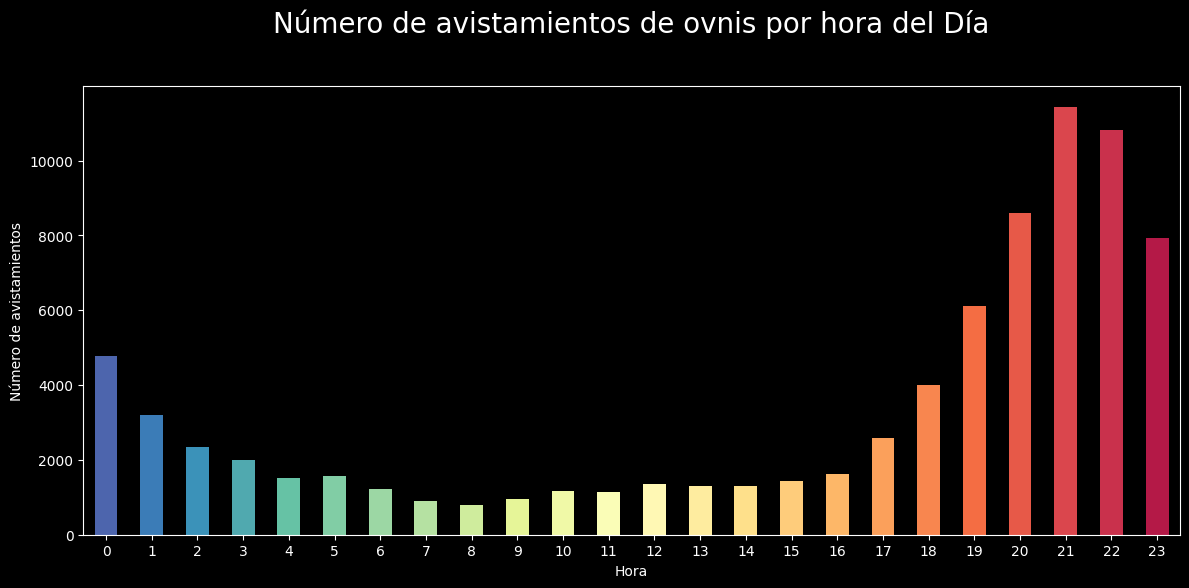

In [39]:
# Obtener la frecuencia de avistamientos por hora del día
avistamientos_por_hora = df['Hour'].value_counts()

# Ordenar las horas del día
horas_ordenadas = sorted(avistamientos_por_hora.index)
color_palette = sns.color_palette("Spectral", n_colors=len(avistamientos_por_hora))[::-1]

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
avistamientos_por_hora.loc[horas_ordenadas].plot(kind='bar', color=color_palette)
plt.title('Número de avistamientos de ovnis por hora del Día', fontsize = 20, y=1.1)
plt.xlabel('Hora')
plt.ylabel('Número de avistamientos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Tipos de OVNIs

In [40]:
# Obtener la frecuencia de cada tipo de ovni
frecuencia_formas = df['UFO_shape'].value_counts()

# Crear un DataFrame para el treemap
data = pd.DataFrame({'Tipo de Ovni': frecuencia_formas.index, 'Frecuencia': frecuencia_formas.values})

# Crear el treemap con Plotly Express y utilizar la paleta 'Viridis'
fig = px.treemap(data, path=['Tipo de Ovni'], values='Frecuencia', title='Distribución de Tipos de Ovnis',
                  color_discrete_sequence=px.colors.sequential.Plasma, template="plotly_dark")
fig.update_layout(title_font=dict(size=22), title_x=0.5)
fig.show()

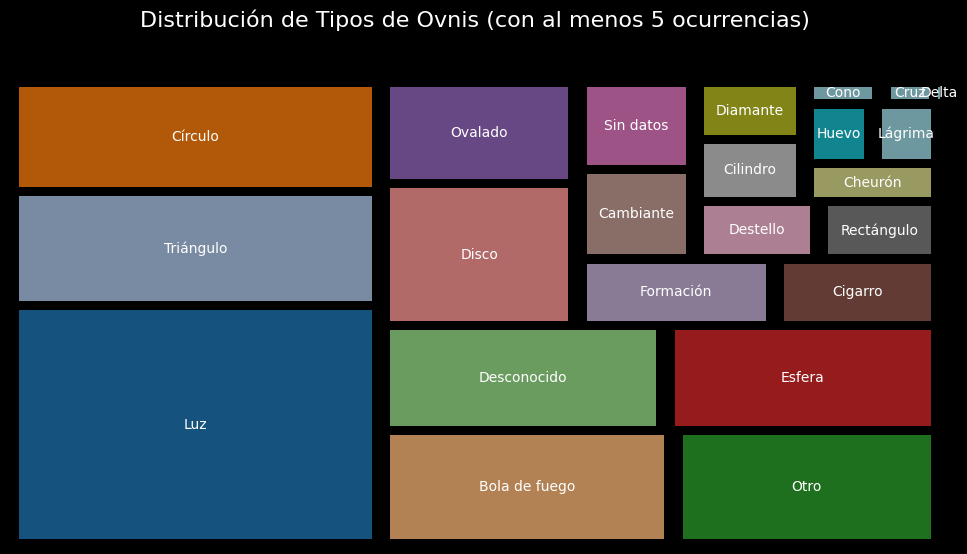

In [66]:
import squarify

# Obtener la frecuencia de cada tipo de ovni
frecuencia_formas = df['UFO_shape'].value_counts()

# Filtrar tipos de ovni con menos de 5 valores
frecuencia_formas = frecuencia_formas[frecuencia_formas >= 5]

# Crear un DataFrame para el treemap
treemap = pd.DataFrame({'Tipo de Ovni': frecuencia_formas.index, 'Frecuencia': frecuencia_formas.values})

plt.figure(figsize=(12,6))
colors = plt.cm.get_cmap('tab20')(range(len(treemap)))
squarify.plot(sizes=treemap['Frecuencia'], label=treemap['Tipo de Ovni'], color=colors, alpha=0.7, pad=True)
plt.axis('off')
plt.title('Distribución de Tipos de Ovnis (con al menos 5 ocurrencias)', fontsize=16, y=1.1)
plt.show()

### Relación entre Forma del OVNI y Duración del Encuentro

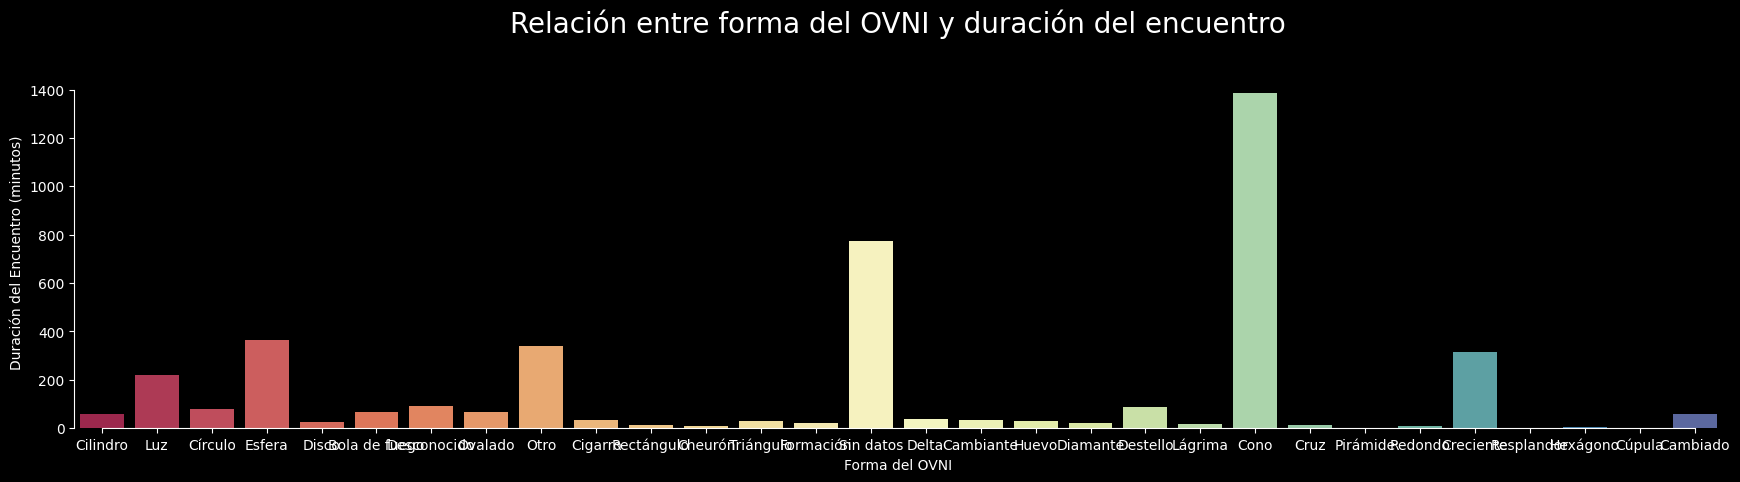

In [42]:
# Selecciono las columnas relevantes de tu dataset
columns_to_plot = ['UFO_shape', 'duration_minutes']

# Creo una gráfica de barras
g = sns.catplot(data=df, x='UFO_shape', y='duration_minutes', kind='bar', ci=None, palette='Spectral', aspect=3.5)

# Título
g.ax.set_title("Relación entre forma del OVNI y duración del encuentro", fontsize = 20, y=1.1)

# Etiquetas a los ejes
plt.xlabel("Forma del OVNI")
plt.ylabel("Duración del Encuentro (minutos)")
sns.despine(trim=True)
plt.tight_layout()
plt.show()

### Relación entre Forma del OVNI y Duración del Encuentro (Top 5)

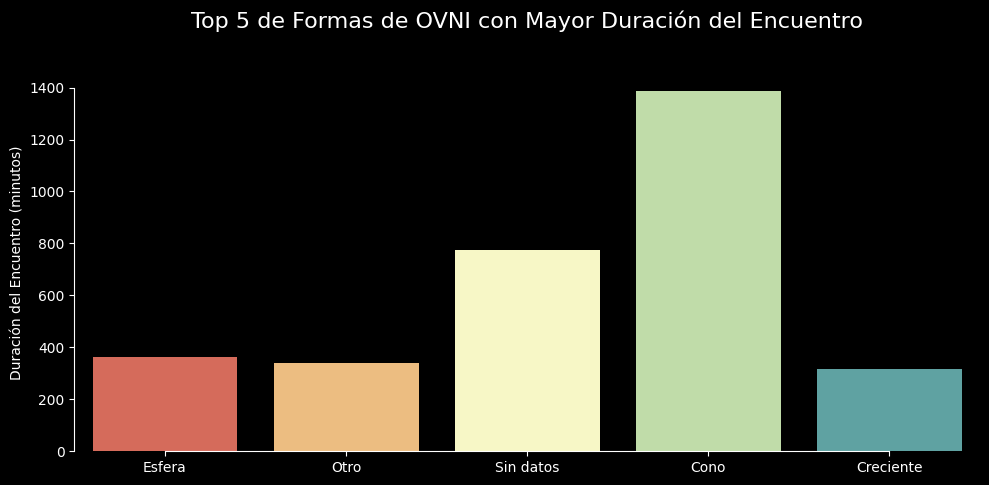

In [43]:
# Obtengo las 5 formas de ovnis con la duración de encuentro más alta, excluyendo 'No data' y 'Other' para que se visualice mejor
formas_a_excluir = ['No data', 'Other']
top5_formas = df[~df['UFO_shape'].isin(formas_a_excluir)].groupby('UFO_shape')['duration_minutes'].mean().nlargest(5).index

# Filtro el DataFrame para incluir solo las 5 formas con la duración de encuentro más alta, excluyendo 'No data' y 'Other'
df_top5 = df[(df['UFO_shape'].isin(top5_formas)) & (~df['UFO_shape'].isin(formas_a_excluir))]

# Gráfica de barras
g = sns.catplot(data=df_top5, x='UFO_shape', y='duration_minutes', kind='bar', ci=None, palette='Spectral', aspect=2)

# Título
g.ax.set_title("Top 5 de Formas de OVNI con Mayor Duración del Encuentro", fontsize=16, y=1.1)

# Etiquetas y retoques
plt.xlabel("")
plt.ylabel("Duración del Encuentro (minutos)")
sns.despine(trim=True)
plt.tight_layout()
plt.show()

### Relacion entre los años y el tipo de ovni avistado

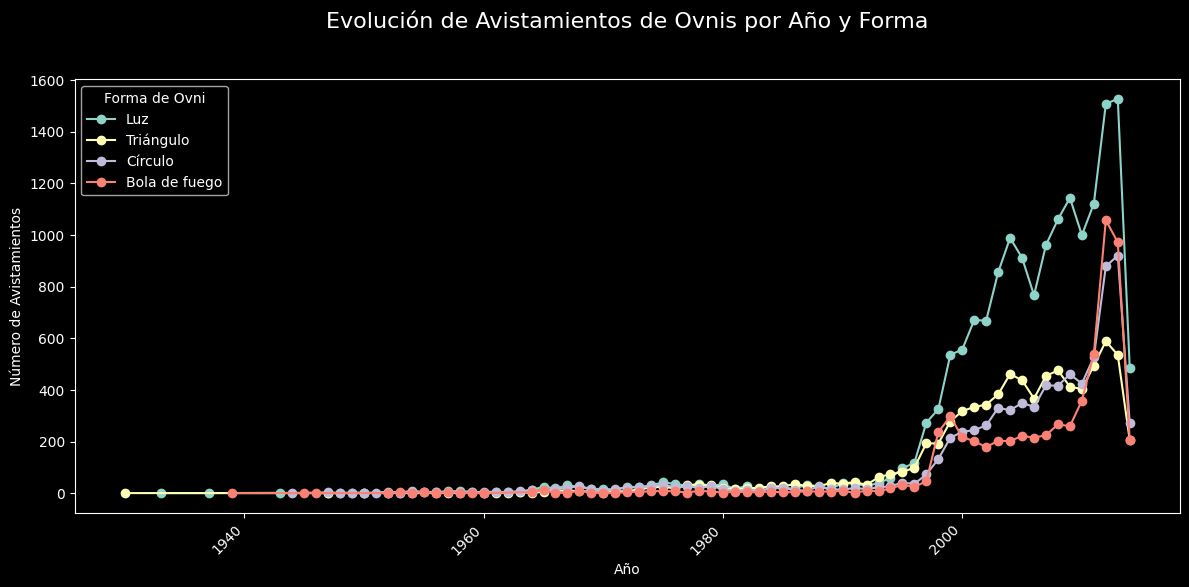

In [44]:
formas_comunes = df['UFO_shape'].value_counts().head(4).index
df_top_formas = df[df['UFO_shape'].isin(formas_comunes)]

# Crear una gráfica de líneas para cada forma de ovni
plt.figure(figsize=(12, 6))

for forma in formas_comunes:
    subset = df_top_formas[df_top_formas['UFO_shape'] == forma]
    avistamientos_por_año = subset['Year'].value_counts()
    años_ordenados = sorted(avistamientos_por_año.index)
    plt.plot(años_ordenados, avistamientos_por_año.loc[años_ordenados], label=forma, marker='o', linestyle='-')

plt.title('Evolución de Avistamientos de Ovnis por Año y Forma', fontsize=16, y=1.1)
plt.xlabel('Año')
plt.ylabel('Número de Avistamientos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Forma de Ovni')
plt.tight_layout()
plt.show()

### El Top 5 de países con más avistamientos

Primero veremos los porcentajes de avistamientos en EEUU y España

In [45]:
# Calcular el porcentaje de avistamientos en Estados Unidos y España
total_avistamientos = len(df)
avistamientos_usa = len(df[df['Country_Code'] == 'USA'])
avistamientos_spain = len(df[df['Country_Code'] == 'ESP'])

porcentaje_usa = (avistamientos_usa / total_avistamientos) * 100
porcentaje_spain = (avistamientos_spain / total_avistamientos) * 100

print(f'Porcentaje de avistamientos en Estados Unidos: {porcentaje_usa}%')
print(f'Porcentaje de avistamientos en España: {porcentaje_spain}%')

Porcentaje de avistamientos en Estados Unidos: 88.52115050768712%
Porcentaje de avistamientos en España: 0.09491813311019247%


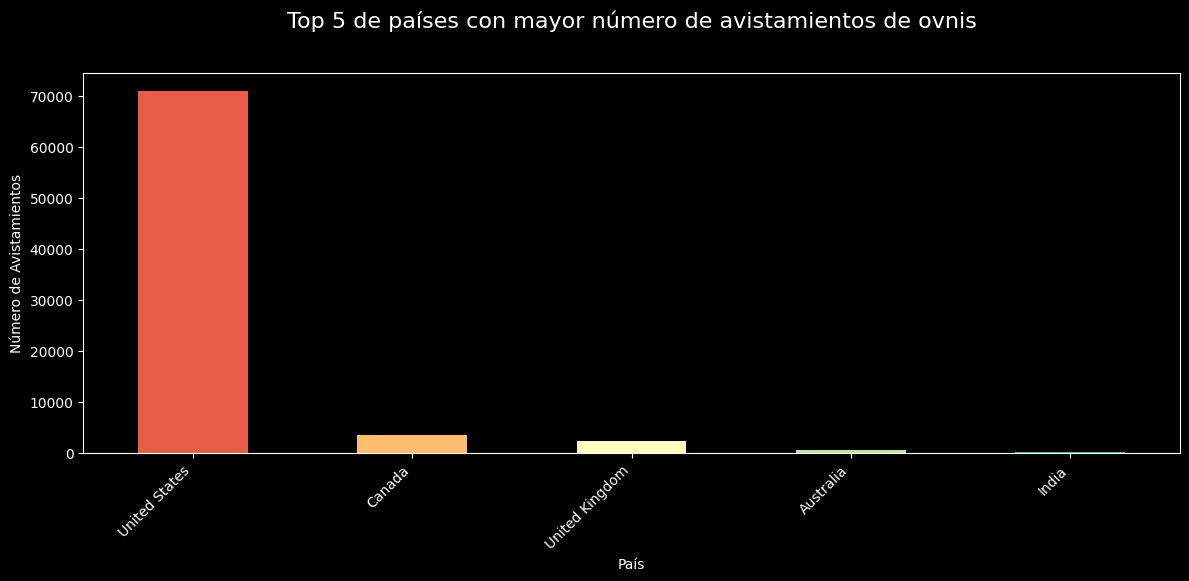

In [46]:
top5_paises = df['Country'].value_counts().head(5)
paleta_colores = sns.color_palette("Spectral", len(top5_paises))
# Crear la gráfica de barras para el top 5
plt.figure(figsize=(12, 6))
top5_paises.plot(kind='bar', color=paleta_colores)
plt.title('Top 5 de países con mayor número de avistamientos de ovnis', fontsize=16, y=1.1)
plt.xlabel('País')
plt.ylabel('Número de Avistamientos')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

### Top 15 paises con más avistamientos (sin USA)

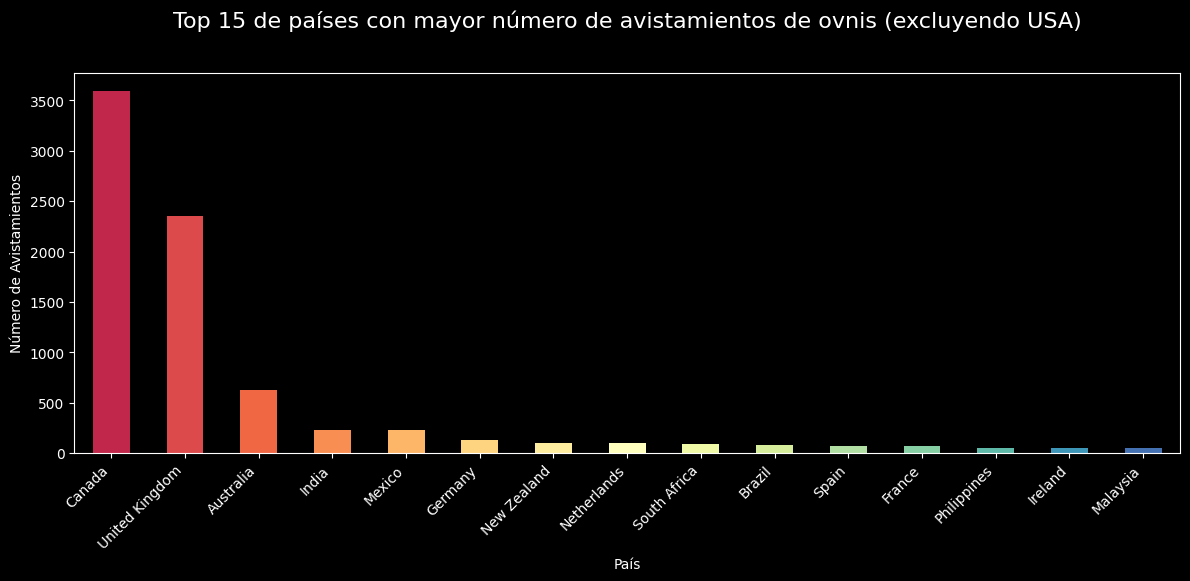

In [47]:
# Excluir a Estados Unidos y contar la frecuencia de avistamientos por país
top_paises_sin_usa = df[df['Country'] != 'United States']['Country'].value_counts().head(15)
paleta_colores = sns.color_palette("Spectral", len(top_paises_sin_usa))

# Crear la gráfica de barras para el top 15 sin Estados Unidos
plt.figure(figsize=(12, 6))
top_paises_sin_usa.plot(kind='bar', color=paleta_colores)
plt.title('Top 15 de países con mayor número de avistamientos de ovnis (excluyendo USA)', fontsize=16, y=1.1)
plt.xlabel('País')
plt.ylabel('Número de Avistamientos')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()


### Minería de datos

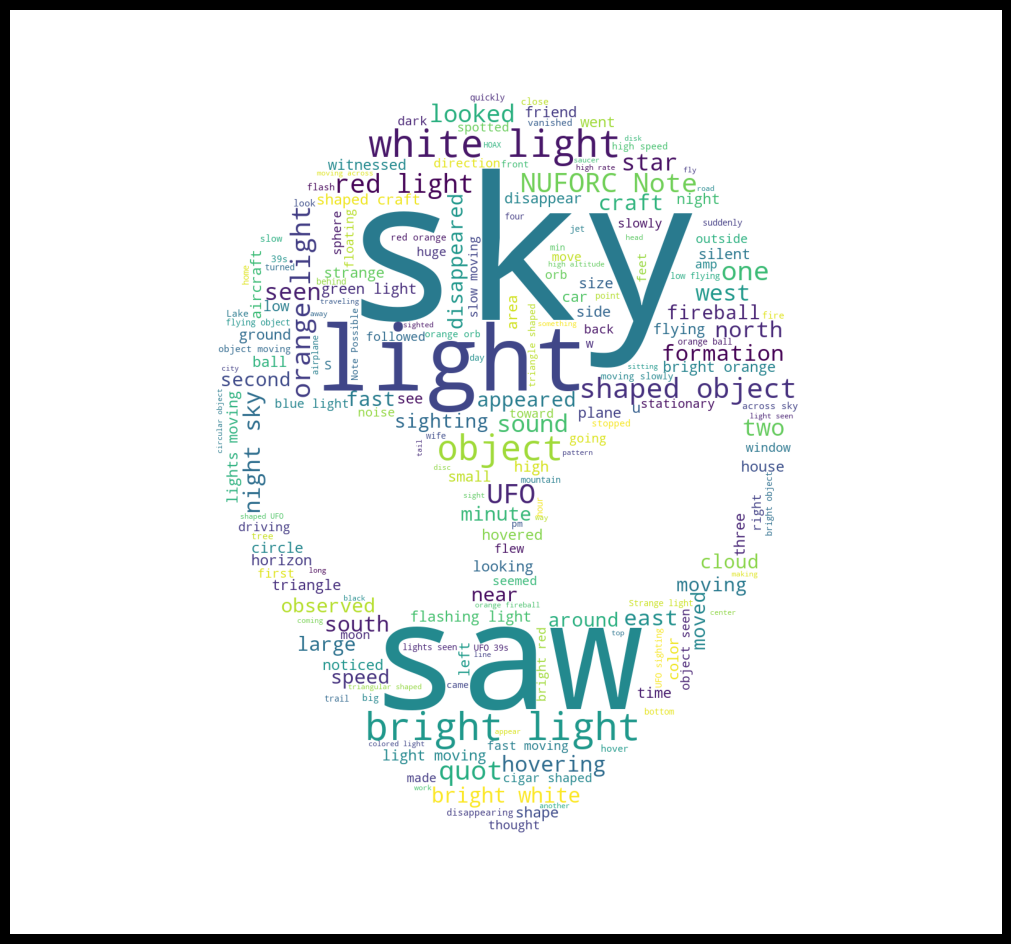

In [48]:
from PIL import Image, ImageFont
from wordcloud import WordCloud
words = [i for i in df['Description']]
    
mask = np.array(Image.open(r"Fotos\alien-head-isolated-png-graphic-style-silhouette-illustration-iconic-transparent-background-element-your-design-high-105019445.jpg"))    
    
words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='white',
                          width=2048,
                          height=1024,
    mask = mask
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Mapas

Aquí podremos ver los avistamientos de OVNIs que hay en todo el mundo...

### Heatmap     




In [49]:
import folium
from folium.plugins import HeatMap
map_obj = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2, width='100%', height='100%', max_bounds=True)
HeatMap(data=df[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(),
         radius=7, max_zoom=10).add_to(map_obj)
map_obj.fit_bounds(map_obj.get_bounds())
map_obj

### Bola del mundo

In [50]:
countries = df["Country"].value_counts().index #lista de paises
countries_ratio = df["Country"].value_counts().values #frecuencia
countries = [i.upper() for i in countries]

In [51]:
import plotly.graph_objs as go

datadict = [
        dict(
        type='choropleth',
        locations = countries,
        z = countries_ratio,
        locationmode = 'country names', # Tipos: "ISO-3" | "USA-states" | "country names" | "geojson-id"
        text = "avistamientos",
        colorscale='Plasma',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)', # Para el color de los limites de los paises
                width = 2
            ) ),
        colorbar = dict(
            title = "Avistamientos por paises",
     )
        )
        ]

layout = dict(
        title = 'Avistamientos en todo el mundo',
        geo = dict(
            scope='world', #Tipos: "world" | "usa" | "europe" | "asia" | "africa" | "north america" | "south america" 
            projection=dict( type='orthographic' ), # Tipos: equirectangular | robinson | orthographic |
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'), # Para el color de los lagos
              )


fig = go.Figure(data=datadict, layout=layout)
iplot(fig)


### Avistamientos de OVNIs en Europa

In [52]:
Europa = df[(df['Country'].isin(['Spain', 'France', 'Germany', 'Italy', 'United Kingdom', 'Portugal', 'Netherlands',
                                'Belgium', 'Switzerland', 'Austria', 'Russia', 'Lithuania', 'Norway', 'Iceland',
                                'Greece', 'Croatia', 'Poland', 'Serbia', 'Ireland', 'Sweden', 'Cyprus', 'Romania',
                                'Ukraine', 'Bulgaria', 'Slovakia', 'Tunisia', 'Finland', 'Kosovo', 'Bosnia and Herzegovina',
                                'Latvia', 'Turkey', 'Denmark', 'Luxembourg', 'Hungary', 'Malta', 'Estonia', 'Czechia', 'Albania']))]['Country']



Seleccionamos el estado que queremos y vemos cuantos avistamientos hay en cada estado.

In [53]:
countries_EU = Europa.value_counts().index # que estados
countries_EU_ratio = Europa.value_counts().values # cuanto aparece cada estado
countries_EU = [i.upper() for i in countries_EU]

In [54]:
import plotly.graph_objs as go
from plotly.offline import iplot

datadict = [
    dict(
        type='choropleth',
        locations=countries_EU,
        z=countries_EU_ratio,
        locationmode='country names',
        text="avistamientos",
        colorscale='Viridis',
        marker=dict(
            line=dict(
                color='rgb(255,255,255)', # Para el color de los limites de los paises
                width=2
            )),
        colorbar=dict(
            title="Avistamientos por países",
        )
    )
]

layout = dict(
    title='Avistamientos en Europa',
    geo=dict(
        scope='europe',  # Cambiado a 'europe' para Europa
        projection=dict(type='robinson'),  # Tipos: equirectangular | robinson | orthographic |
        showlakes=True,
        lakecolor='rgb(255, 255,255)'  # Para el color de los lagos
    )
)

fig = go.Figure(data=datadict, layout=layout)
iplot(fig)


### Mapa de Europa sin Reino Unido

In [55]:
Europa_without_UK = df[(df['Country'].isin(['Spain', 'France', 'Germany', 'Italy', 'Portugal', 'Netherlands',
                                'Belgium', 'Switzerland', 'Austria', 'Russia', 'Lithuania', 'Norway', 'Iceland',
                                'Greece', 'Croatia', 'Poland', 'Serbia', 'Ireland', 'Sweden', 'Cyprus', 'Romania',
                                'Ukraine', 'Bulgaria', 'Slovakia', 'Tunisia', 'Finland', 'Kosovo', 'Bosnia and Herzegovina',
                                'Latvia', 'Turkey', 'Denmark', 'Luxembourg', 'Hungary', 'Malta', 'Estonia', 'Czechia', 'Albania']))]['Country']



Seleccionamos el estado que queremos (en este caso sin UK) y vemos cuantos avistamientos hay en cada estado.

In [56]:
countries_EU_without_UK = Europa_without_UK.value_counts().index #que estados
countries_EU_ratio_without_UK = Europa_without_UK.value_counts().values #cuanto aparece cada estado
countries_EU_without_UK = [i.upper() for i in countries_EU_without_UK]

In [57]:
import plotly.graph_objs as go
from plotly.offline import iplot

datadict = [
    dict(
        type='choropleth',
        locations=countries_EU_without_UK,
        z=countries_EU_ratio_without_UK,
        locationmode='country names',
        text="avistamientos",
        colorscale = 'Viridis',
        marker=dict(
            line=dict(
                color='rgb(255,255,255)',  # color de los límites de los países (255 255 255 = blanco)
                width=2
            )),
        colorbar=dict(
            title="Avistamientos por países",
        )
    )
]

layout = dict(
    title='Avistamientos en Europa sin Reino Unido',
    geo=dict(
        scope='europe',  # Cambiado a 'europe' para Europa
        projection=dict(type='robinson'),  # equirectangular | robinson | orthographic |
        showlakes=True,
        lakecolor='rgb(255, 255,255)'  # color de los lagos
    )
)

fig = go.Figure(data=datadict, layout=layout)
iplot(fig)


### Avistamientos de OVNIs en España

### Mapa de España

In [58]:
from folium.plugins import FastMarkerCluster

lats2018 = df['latitude'].tolist()
lons2018 = df['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[40.41831, -3.70275], zoom_start=6)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [59]:
provinciasEspañolas = df[df.Country == "Spain"]["Region"].value_counts().index
provinciasEspañolas_ratio = df[df.Country == "Spain"]["Region"].value_counts().values

Si queremos ver los avistamientos, por provincias de españa en una grafica circular...

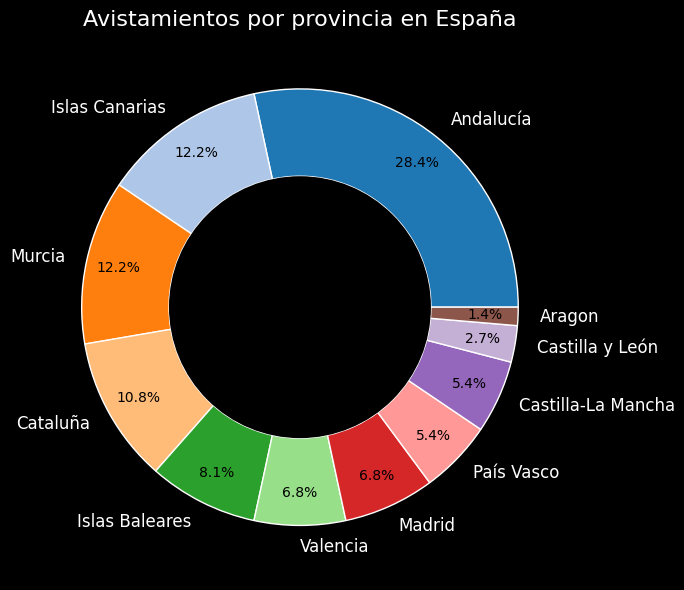

In [60]:
labels = provinciasEspañolas
sizes = provinciasEspañolas_ratio
colors = plt.cm.tab20.colors  # Para ajustar la paleta

# Mapeo de nombres a cambiar
mapeo = {
    'Andalusia': 'Andalucía',
    'Canary Islands': 'Islas Canarias',
    'Catalonia': 'Cataluña',
    'Balearic Islands': 'Islas Baleares',
    'Basque Country': 'País Vasco',
    'Castille-La Mancha': 'Castilla-La Mancha',
    'Castille and Leon': 'Castilla y León'
}

# Sustituir nombres en la lista de etiquetas (labels)
labels_actualizados = [mapeo.get(nombre, nombre) for nombre in labels]

# Crear el gráfico de rosquilla
fig, ax = plt.subplots(figsize=(10, 6)) 

# Crear un gráfico de rosquilla
wedges, texts, autotexts = ax.pie(sizes, labels=labels_actualizados, autopct='%1.1f%%', 
                                  colors=colors, pctdistance=0.85,
                                  wedgeprops=dict(width=0.4, edgecolor='w'))

# Etiquetas y porcentajes en el centro de la rosquilla
for text, autotext in zip(texts, autotexts):
    text.set(size=12)
    autotext.set(size=10, color='black')

# Dibujar el círculo interno (rosquilla)
centre_circle = plt.Circle((0, 0), 0.6, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Avistamientos por provincia en España", fontsize=16)
plt.tight_layout()
plt.show()

Los datos de españa...

In [61]:
Spain_info = df[df.Country == "Spain"][['Date_time','Region','Locale','Encounter_Duration','UFO_shape','Description']].sort_values(by=['Date_time']).style.set_properties(subset=['Description'], **{'width': '500px','height': '50px'})
Spain_info

### Avistamientos de OVNIs en Andalucía

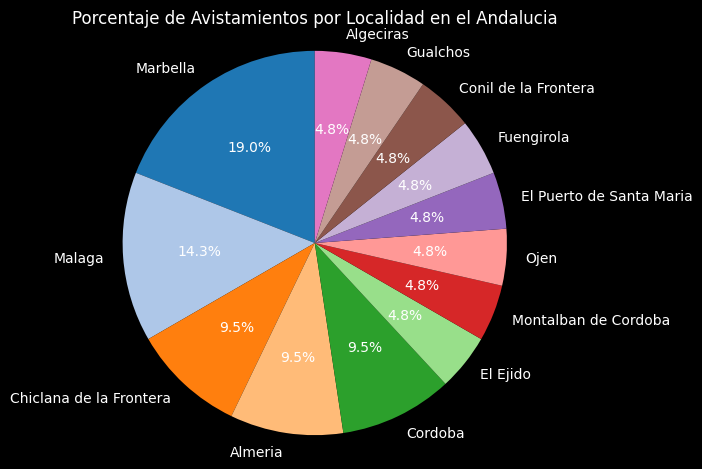

In [62]:
comunidad_autonoma_Andalucia = "Andalusia"

# Filtrar por la comunidad autónoma deseada
df_Andalucia = df[(df.Country == "Spain") & (df.Region == comunidad_autonoma_Andalucia)]

# Obtener las localidades únicas en el País Vasco
localidades_Andalucia = df_Andalucia["Locale"].unique()

# Contar los avistamientos por localidad en el País Vasco
avistamientos_por_localidad = []

for localidad in localidades_Andalucia:
    avistamientos = len(df_Andalucia[df_Andalucia["Locale"] == localidad])
    avistamientos_por_localidad.append((localidad, avistamientos))

# Crear un DataFrame con los resultados
df_avistamientos_Andalucia = pd.DataFrame(avistamientos_por_localidad, columns=["Localidad", "Avistamientos"])

# Ordenar el DataFrame por la columna de avistamientos
df_avistamientos_Andalucia = df_avistamientos_Andalucia.sort_values(by="Avistamientos", ascending=False)

fig, ax = plt.subplots()
sizes = df_avistamientos_Andalucia["Avistamientos"] / df_avistamientos_Andalucia["Avistamientos"].sum() * 100
ax.pie(sizes, labels=df_avistamientos_Andalucia["Localidad"], autopct='%1.1f%%',colors=colors, startangle=90)

plt.axis('equal')
plt.title("Porcentaje de Avistamientos por Localidad en el Andalucia")
plt.tight_layout()
plt.show()

### Avistamientos de OVNIs en Cataluña

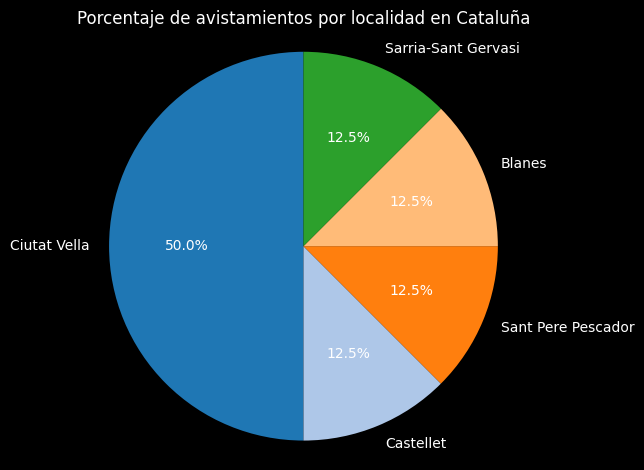

In [63]:
comunidad_autonoma_Cataluña = "Catalonia"

# Filtrar por la comunidad autónoma deseada
df_Cataluña = df[(df.Country == "Spain") & (df.Region == comunidad_autonoma_Cataluña)]

# Obtener las localidades únicas en el País Vasco
localidades_Cataluña = df_Cataluña["Locale"].unique()

# Contar los avistamientos por localidad en el País Vasco
avistamientos_por_localidad = []

for localidad in localidades_Cataluña:
    avistamientos = len(df_Cataluña[df_Cataluña["Locale"] == localidad])
    avistamientos_por_localidad.append((localidad, avistamientos))

# Crear un DataFrame con los resultados
df_avistamientos_Cataluña = pd.DataFrame(avistamientos_por_localidad, columns=["Localidad", "Avistamientos"])

# Ordenar el DataFrame por la columna de avistamientos
df_avistamientos_Cataluña = df_avistamientos_Cataluña.sort_values(by="Avistamientos", ascending=False)

fig, ax = plt.subplots()
sizes = df_avistamientos_Cataluña["Avistamientos"] / df_avistamientos_Cataluña["Avistamientos"].sum() * 100
ax.pie(sizes, labels=df_avistamientos_Cataluña["Localidad"], autopct='%1.1f%%', colors=colors, startangle=90)
plt.axis('equal')
plt.title("Porcentaje de avistamientos por localidad en Cataluña")
plt.tight_layout()
plt.show()

### Avistamientos de OVNIs en la comunidad de Madrid

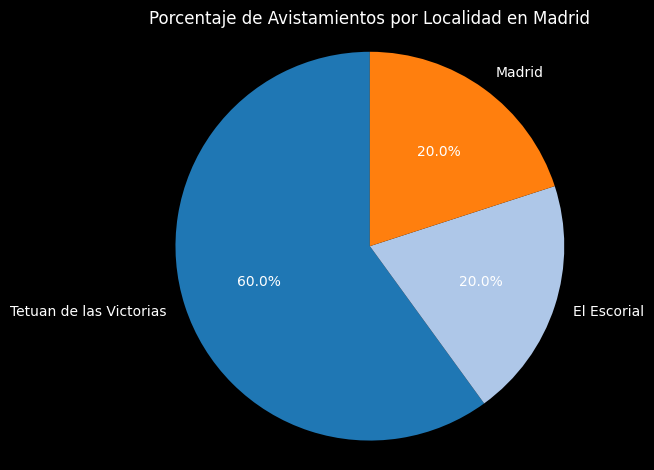

In [64]:
comunidad_autonoma_madrid = "Madrid"

# Filtrar por la comunidad autónoma deseada
df_madrid = df[(df.Country == "Spain") & (df.Region == comunidad_autonoma_madrid)]

# Obtener las localidades únicas en Madrid
localidades_madrid = df_madrid["Locale"].unique()

# Contar los avistamientos por localidad en Madrid
avistamientos_por_localidad = []

for localidad in localidades_madrid:
    avistamientos = len(df_madrid[df_madrid["Locale"] == localidad])
    avistamientos_por_localidad.append((localidad, avistamientos))

# Crear un DataFrame con los resultados
df_avistamientos_madrid = pd.DataFrame(avistamientos_por_localidad, columns=["Localidad", "Avistamientos"])

# Ordenar el DataFrame por la columna de avistamientos
df_avistamientos_madrid = df_avistamientos_madrid.sort_values(by="Avistamientos", ascending=False)

fig, ax = plt.subplots()
sizes = df_avistamientos_madrid["Avistamientos"] / df_avistamientos_madrid["Avistamientos"].sum() * 100
ax.pie(sizes, labels=df_avistamientos_madrid["Localidad"], autopct='%1.1f%%',colors=colors, startangle=90)
plt.axis('equal')
plt.title("Porcentaje de Avistamientos por Localidad en Madrid")
plt.tight_layout()
plt.show()

# Informacion exclusiva sobre...

##  Área 51

In [65]:
from folium.plugins import FastMarkerCluster

lats2018 = df['latitude'].tolist()
lons2018 = df['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[37.233333, -115.808333], zoom_start=8.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

El Área 51 se encuentra en la base de la cordillera Groom Lake, en el desierto de Mojave, al noroeste de Las Vegas, Nevada. 

Fue establecida durante la Guerra Fría en la década de 1950 como una base de pruebas y entrenamiento para aeronaves experimentales y de reconocimiento. Su existencia se mantuvo en secreto durante décadas, y el gobierno de Estados Unidos no reconoció oficialmente la base hasta la década de 1990. 

La falta de información oficial sobre las actividades de la Área 51 generó numerosas teorías de conspiración. 

Algunas teorías sugieren que la base ha sido utilizada para estudiar tecnología alienígena y realizar experimentos con naves espaciales no identificadas (OVNIs). Aunque la Área 51 sigue siendo una base militar activa, su enfoque ha evolucionado con el tiempo. 

Se cree que actualmente se utiliza para probar aeronaves y tecnologías clasificadas.El acceso a la Área 51 está altamente restringido. La base está rodeada por vallas y señales de advertencia, y la entrada está prohibida para el público en general. 